#### Extracting original healthy data used to train the TFLite micro model


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Selecting the relevant data
vibe_col = [1,2,3]
original_healthy_vert = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned/OneKhz2023-03-24t0*.csv'
original_healthy_hori = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/horizontal-cleaned/OneKhz2023-03-24t0*.csv'
original_unhealthy_vert = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/unhealthy/loose-base/first-batch-22-3-2023/vibration/vertical-cleaned/OneKhz2023-03-23t0*.csv'
original_unhealthy_hori = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/unhealthy/loose-base/first-batch-22-3-2023/vibration/horizontal-cleaned/OneKhz2023-03-23t0*.csv'

# Loading the data
def dataReader(datapath):
    data_n = pd.DataFrame()
    for file in glob.glob(datapath):
        df = pd.read_csv(file, usecols=['x', 'y', 'z'])

        data_n = pd.concat([data_n, df], axis=0)
        # print("done with file: " + file)

    return data_n

original_data_healthy_vert = dataReader(original_healthy_vert)
original_data_healthy_hori = dataReader(original_healthy_hori)
original_data_unhealthy_vert = dataReader(original_unhealthy_vert)
original_data_unhealthy_hori = dataReader(original_unhealthy_hori)

print("Original healthy data size: ")
print(original_data_healthy_vert.shape)
print(original_data_healthy_hori.shape)
print("Original unhealthy data size: ")
print(original_data_unhealthy_vert.shape)
print(original_data_unhealthy_hori.shape)


Original healthy data size: 
(4917380, 3)
(4900690, 3)
Original unhealthy data size: 
(4940044, 3)
(4943184, 3)


In [43]:
# Reducing the data size to be all the same

num_rows = 4900000

original_data_healthy_vert_cut = original_data_healthy_vert[:4900000]
original_data_healthy_hori_cut = original_data_healthy_hori[:4900000]
original_data_unhealthy_vert_cut = original_data_unhealthy_vert[:4900000]
original_data_unhealthy_hori_cut = original_data_unhealthy_hori[:4900000]

print("Cut healthy data size: ")
print(original_data_healthy_vert_cut.shape)
print(original_data_healthy_hori_cut.shape)
print("Cut unhealthy data size: ")
print(original_data_unhealthy_vert_cut.shape)
print(original_data_unhealthy_hori_cut.shape)

Cut healthy data size: 
(4900000, 3)
(4900000, 3)
Cut unhealthy data size: 
(4900000, 3)
(4900000, 3)


In [44]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

original_data_healthy_vert_array = []
original_data_healthy_hori_array = []
original_data_unhealthy_vert_array = []
original_data_unhealthy_hori_array = []

def dataToArray(data):
    signalX = data.iloc[:, 0]
    signalY = data.iloc[:, 1]
    signalZ = data.iloc[:, 2]
    signal = np.array([signalX, signalY, signalZ])
    return signal

# Original set of healthy data
original_data_healthy_vert_array = np.array(dataToArray(original_data_healthy_vert_cut))
original_data_healthy_hori_array = np.array(dataToArray(original_data_healthy_hori_cut))

# Original set of unhealthy data (Loose base 1 day)
original_data_unhealthy_vert_array = np.array(dataToArray(original_data_unhealthy_vert_cut))
original_data_unhealthy_hori_array = np.array(dataToArray(original_data_unhealthy_hori_cut))

print("Original healthy data shape: ")
print(original_data_healthy_vert_array.shape)
print(original_data_healthy_hori_array.shape)
print("Original unhealthy data shape: ")
print(original_data_unhealthy_vert_array.shape)
print(original_data_unhealthy_hori_array.shape)

Original healthy data shape: 
(3, 4900000)
(3, 4900000)
Original unhealthy data shape: 
(3, 4900000)
(3, 4900000)


In [45]:
# check for nan and print the index
def checkForNan(array):
    for i in range(len(array)):
        for j in range(len(array[i])):
            if np.isnan(array[i][j]):
                print("nan found at index: " + str(i) + " " + str(j))
                      

checkForNan(original_data_healthy_vert_array)
checkForNan(original_data_healthy_hori_array)
checkForNan(original_data_unhealthy_vert_array)
checkForNan(original_data_unhealthy_hori_array)

In [46]:
duration = 100

def reshapeArray(array, duration):
    samples = int(array.shape[1] / duration)
    return array.reshape(3, samples, duration)

def normalize_segments(data):
    num_samples = data.shape[1]
    MinMax = MinMaxScaler(feature_range=(0, 1))
    # scaler = StandardScaler()
    # scaler = RobustScaler()
    
    for i in range(num_samples):
        data[:, i, :] = MinMax.fit_transform(data[:, i, :].T).T

    return data
    
original_data_healthy_vert_reshaped = reshapeArray(original_data_healthy_vert_array, duration)
original_data_healthy_hori_reshaped = reshapeArray(original_data_healthy_hori_array, duration)
original_data_unhealthy_vert_reshaped = reshapeArray(original_data_unhealthy_vert_array, duration)
original_data_unhealthy_hori_reshaped = reshapeArray(original_data_unhealthy_hori_array, duration)

# Preprocess and normalize each segment individually
original_data_healthy_vert_normalised = normalize_segments(original_data_healthy_vert_reshaped)
original_data_healthy_hori_normalised = normalize_segments(original_data_healthy_hori_reshaped)
original_data_unhealthy_vert_normalised = normalize_segments(original_data_unhealthy_vert_reshaped)
original_data_unhealthy_hori_normalised = normalize_segments(original_data_unhealthy_hori_reshaped)

print("Reshaped size: ", original_data_healthy_vert_reshaped.shape)
print("Normalized size: ", original_data_healthy_vert_normalised.shape)

Reshaped size:  (3, 49000, 100)
Normalized size:  (3, 49000, 100)


#### Extracting data collected using RPI


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

def newDataReader(datapath):
    
    with open(datapath, 'r') as file:
        lines = file.readlines()

    data_blocks = []  # to store individual data blocks of 1000 lines each

    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if '----' in line:
            i += 1
            continue
        else:
            start = i
            # Find the end of this block (either another dash line or end of file)
            while i < len(lines) and '----' not in lines[i]:
                i += 1
            end = i
            
            block = lines[start:end]
            data = [list(map(float, item.split(','))) for item in block if ',' in item]  # convert string to list of floats
            
            # Check the length of data, adjust and log if necessary
            if len(data) < 1000:
                padding = [[0.0] * 9 for _ in range(1000 - len(data))]
                data.extend(padding)
                # print(f"Data block starting at line {start} has less than 1000 lines. Padding with zeros.")
            elif len(data) > 1000:
                data = data[:1000]
                # print(f"Data block starting at line {start} has more than 1000 lines. Truncating to 1000.")
            
            data_blocks.append(data)

    # Convert list of data blocks into a 3D numpy array
    datasets_array = np.array(data_blocks)
    
    return datasets_array


## Reading in Healthy2 data
Healthy2_dataset = []  # to accumulate datasets from all matching files

healthy2_location = "C:/Users/jared/Desktop/EG3301R_Repos/collected_data/RPICollectedData/Healthy2/*"
for filename in glob.glob(healthy2_location):
    data = newDataReader(filename)
    Healthy2_dataset.append(data)
    
# Concatenate all datasets from different files
Healthy2 = np.concatenate(Healthy2_dataset, axis=0)
Healthy2 = np.transpose(Healthy2, (2, 0, 1))
healthy2_df = pd.DataFrame(Healthy2.reshape(Healthy2.shape[0], -1))
healthy2_df = healthy2_df.T


## Reading in Healthy3 data
Healthy3_dataset = []  # to accumulate datasets from all matching files

healthy3_location = "C:/Users/jared/Desktop/EG3301R_Repos/collected_data/RPICollectedData/Healthy3/*"
for filename in glob.glob(healthy3_location):
    data = newDataReader(filename)
    Healthy3_dataset.append(data)

# Concatenate all datasets from different files
Healthy3 = np.concatenate(Healthy3_dataset, axis=0)
Healthy3 = np.transpose(Healthy3, (2, 0, 1))
healthy3_df = pd.DataFrame(Healthy3.reshape(Healthy3.shape[0], -1))
healthy3_df = healthy3_df.T


## Reading in Cavitation2 data
Cavitation2_dataset = []  # to accumulate datasets from all matching files

Cavitation2_location = "C:/Users/jared/Desktop/EG3301R_Repos/collected_data/RPICollectedData/Cavitation2/*"

for filename in glob.glob(Cavitation2_location):
    data = newDataReader(filename)
    Cavitation2_dataset.append(data)

# Concatenate all datasets from different files
Cavitation2 = np.concatenate(Cavitation2_dataset, axis=0)
Cavitation2 = np.transpose(Cavitation2, (2, 0, 1))
cavitation2_df = pd.DataFrame(Cavitation2.reshape(Cavitation2.shape[0], -1))
cavitation2_df = cavitation2_df.T

#### Extracting test data from Google Sheets

In [75]:
import os
import pandas as pd

# Define the directory containing Excel files
folder_path = "C:/Users/jared/Desktop/EG3301R_Repos/collected_data/GoogleSheetsData/"

# Create an empty DataFrame to store the extracted data
extracted_data = pd.DataFrame()

# Count the number of files read
num_files = 0
# Loop through files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):  # Adjust file extension if needed
        num_files += 1
        file_path = os.path.join(folder_path, filename)
        
        # Read the Excel file into a DataFrame (assuming the data starts from row 1)
        df = pd.read_csv(file_path, usecols=[1,2,3,4,5,6,9])

        print(df.shape)
        
        # Append the extracted data to the main DataFrame
        extracted_data = pd.concat([extracted_data, df], axis=0, ignore_index=True)

print("Number of files read: ", num_files)
print(extracted_data.shape)

(764000, 7)
(799000, 7)
(899960, 7)
(900000, 7)
Number of files read:  4
(3362960, 7)


In [87]:
print("Healthy2 shape:", healthy2_df.shape)
print("Healthy3 shape:", healthy3_df.shape)
print("Cavitation2 shape:", cavitation2_df.shape)
print("Sheetstest shape:", extracted_data.shape)

healthy2_vert_df = healthy2_df.iloc[:, :3]
healthy2_hori_df = healthy2_df.iloc[:, 3:6]
healthy3_vert_df = healthy3_df.iloc[:, :3]
healthy3_hori_df = healthy3_df.iloc[:, 3:6]
cavitation2_vert_df = cavitation2_df.iloc[:, :3]
cavitation2_hori_df = cavitation2_df.iloc[:, 3:6]
Sheetstest_healthy_vert_df = extracted_data.iloc[:, :3]
Sheetstest_healthy_hori_df = extracted_data.iloc[:, 3:6]
Sheetstest_healthy_curr_df = extracted_data.iloc[:, 6:7]

print("Healthy2_vert shape:", healthy2_vert_df.shape)
print("Healthy2_hori shape:", healthy2_hori_df.shape)
print("Healthy3_vert shape:", healthy3_vert_df.shape)
print("Healthy3_hori shape:", healthy3_hori_df.shape)
print("Cavitation2_vert shape:", cavitation2_vert_df.shape)
print("Cavitation2_hori shape:", cavitation2_hori_df.shape)
print("Sheetstest_healthy_vert shape:", Sheetstest_healthy_vert_df.shape)
print("Sheetstest_healthy_hori shape:", Sheetstest_healthy_hori_df.shape)

Healthy2 shape: (39839000, 9)
Healthy3 shape: (11853000, 9)
Cavitation2 shape: (8764000, 9)
Sheetstest shape: (3362960, 7)
Healthy2_vert shape: (39839000, 3)
Healthy2_hori shape: (39839000, 3)
Healthy3_vert shape: (11853000, 3)
Healthy3_hori shape: (11853000, 3)
Cavitation2_vert shape: (8764000, 3)
Cavitation2_hori shape: (8764000, 3)
Sheetstest_healthy_vert shape: (3362960, 3)
Sheetstest_healthy_hori shape: (3362960, 3)


In [88]:
# Reducing the data size to be all the same

data_healthy2_vert_cut = healthy2_vert_df[:4900000]
data_healthy2_hori_cut = healthy2_hori_df[:4900000]
data_healthy3_vert_cut = healthy3_vert_df[:4900000]
data_healthy3_hori_cut = healthy3_hori_df[:4900000]
data_cavitation2_vert_cut = cavitation2_vert_df[:4900000]
data_cavitation2_hori_cut = cavitation2_hori_df[:4900000]

print("Cut healthy2_vert data size: ", data_healthy2_vert_cut.shape)
print("Cut healthy2_hori data size: ", data_healthy2_hori_cut.shape)
print("Cut healthy3_vert data size: ", data_healthy3_vert_cut.shape)
print("Cut healthy3_hori data size: ", data_healthy3_hori_cut.shape)
print("Cut cavitation2_vert data size: ", data_cavitation2_vert_cut.shape)
print("Cut cavitation2_hori data size: ", data_cavitation2_hori_cut.shape)

data_sheetstest_data_healthy_vert_cut = Sheetstest_healthy_vert_df[:3000000]
data_sheetstest_data_healthy_hori_cut = Sheetstest_healthy_hori_df[:3000000]

print("Cut Sheetstest_healthy_vert data size: ", data_sheetstest_data_healthy_vert_cut.shape)
print("Cut Sheetstest_healthy_hori data size: ", data_sheetstest_data_healthy_hori_cut.shape)


Cut healthy2_vert data size:  (4900000, 3)
Cut healthy2_hori data size:  (4900000, 3)
Cut healthy3_vert data size:  (4900000, 3)
Cut healthy3_hori data size:  (4900000, 3)
Cut cavitation2_vert data size:  (4900000, 3)
Cut cavitation2_hori data size:  (4900000, 3)
Cut Sheetstest_healthy_vert data size:  (3000000, 3)
Cut Sheetstest_healthy_hori data size:  (3000000, 3)


In [89]:

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data_healthy2_vert_array = []
data_healthy3_vert_array = []
data_cavitation2_vert_array = []
data_sheetstest_healthy_vert_array = []
data_sheetstest_healthy_hori_array = []

def dataToArray(data):
    signalX = data.iloc[:, 0]
    signalY = data.iloc[:, 1]
    signalZ = data.iloc[:, 2]
    signal = np.array([signalX, signalY, signalZ])
    return signal


data_healthy2_vert_array = np.array(dataToArray(data_healthy2_vert_cut))
data_healthy2_hori_array = np.array(dataToArray(data_healthy2_hori_cut))
data_healthy3_vert_array = np.array(dataToArray(data_healthy3_vert_cut))
data_healthy3_hori_array = np.array(dataToArray(data_healthy3_hori_cut))
data_cavitation2_vert_array = np.array(dataToArray(data_cavitation2_vert_cut))
data_cavitation2_hori_array = np.array(dataToArray(data_cavitation2_hori_cut))
data_sheetstest_healthy_vert_array = np.array(dataToArray(data_sheetstest_data_healthy_vert_cut))
data_sheetstest_healthy_hori_array = np.array(dataToArray(data_sheetstest_data_healthy_hori_cut))

print("Healthy2_vert shape:", data_healthy2_vert_array.shape)
print("Healthy2_hori shape:", data_healthy2_hori_array.shape)
print("Healthy3_vert shape:", data_healthy3_vert_array.shape)
print("Healthy3_hori shape:", data_healthy3_hori_array.shape)
print("Cavitation2_vert shape:", data_cavitation2_vert_array.shape)
print("Cavitation2_hori shape:", data_cavitation2_hori_array.shape)
print("Sheetstest_healthy_vert shape:", data_sheetstest_healthy_vert_array.shape)
print("Sheetstest_healthy_hori shape:", data_sheetstest_healthy_hori_array.shape)

Healthy2_vert shape: (3, 4900000)
Healthy2_hori shape: (3, 4900000)
Healthy3_vert shape: (3, 4900000)
Healthy3_hori shape: (3, 4900000)
Cavitation2_vert shape: (3, 4900000)
Cavitation2_hori shape: (3, 4900000)
Sheetstest_healthy_vert shape: (3, 3000000)
Sheetstest_healthy_hori shape: (3, 3000000)


In [90]:

# check for nan and print the index
def checkForNan(array):
    for i in range(len(array)):
        for j in range(len(array[i])):
            if np.isnan(array[i][j]):
                print("nan found at index: " + str(i) + " " + str(j))

checkForNan(data_healthy2_vert_array)
checkForNan(data_healthy2_hori_array)
checkForNan(data_healthy3_vert_array)
checkForNan(data_healthy3_hori_array)
checkForNan(data_cavitation2_vert_array)
checkForNan(data_cavitation2_hori_array)
checkForNan(data_sheetstest_healthy_vert_array)
checkForNan(data_sheetstest_healthy_hori_array)

In [91]:

# Step 1a: Preprocess the data

duration = 100

def reshapeArray(array, duration):
    samples = int(array.shape[1] / duration)
    return array.reshape(3, samples, duration)

def normalize_segments(data):
    num_samples = data.shape[1]
    MinMax = MinMaxScaler(feature_range=(0, 1))
    # scaler = StandardScaler()
    # scaler = RobustScaler()
    
    for i in range(num_samples):
        data[:, i, :] = MinMax.fit_transform(data[:, i, :].T).T

    return data

data_healthy2_vert_reshaped = reshapeArray(data_healthy2_vert_array, duration)
data_healthy2_hori_reshaped = reshapeArray(data_healthy2_hori_array, duration)
data_healthy3_vert_reshaped = reshapeArray(data_healthy3_vert_array, duration)
data_healthy3_hori_reshaped = reshapeArray(data_healthy3_hori_array, duration)
data_cavitation2_vert_reshaped = reshapeArray(data_cavitation2_vert_array, duration)
data_cavitation2_hori_reshaped = reshapeArray(data_cavitation2_hori_array, duration)
data_sheetstest_healthy_vert_reshaped = reshapeArray(data_sheetstest_healthy_vert_array, duration)
data_sheetstest_healthy_hori_reshaped = reshapeArray(data_sheetstest_healthy_hori_array, duration)

# Preprocess and normalize each segment individually
data_healthy2_vert_normalised = normalize_segments(data_healthy2_vert_reshaped)
data_healthy2_hori_normalised = normalize_segments(data_healthy2_hori_reshaped)
data_healthy3_vert_normalised = normalize_segments(data_healthy3_vert_reshaped)
data_healthy3_hori_normalised = normalize_segments(data_healthy3_hori_reshaped)
data_cavitation2_vert_normalised = normalize_segments(data_cavitation2_vert_reshaped)
data_cavitation2_hori_normalised = normalize_segments(data_cavitation2_hori_reshaped)
data_sheetstest_healthy_vert_normalised = normalize_segments(data_sheetstest_healthy_vert_reshaped)
data_sheetstest_healthy_hori_normalised = normalize_segments(data_sheetstest_healthy_hori_reshaped)

# Transpose the data to be in the format (samples, features, duration)
data_healthy2_vert_normalised_transposed = np.transpose(data_healthy2_vert_normalised, (1, 0, 2))
data_healthy2_hori_normalised_transposed = np.transpose(data_healthy2_hori_normalised, (1, 0, 2))
data_healthy3_vert_normalised_transposed = np.transpose(data_healthy3_vert_normalised, (1, 0, 2))
data_healthy3_hori_normalised_transposed = np.transpose(data_healthy3_hori_normalised, (1, 0, 2))
data_cavitation2_vert_normalised_transposed = np.transpose(data_cavitation2_vert_normalised, (1, 0, 2))
data_cavitation2_hori_normalised_transposed = np.transpose(data_cavitation2_hori_normalised, (1, 0, 2))
data_sheetstest_healthy_vert_normalised_transposed = np.transpose(data_sheetstest_healthy_vert_normalised, (1, 0, 2))
data_sheetstest_healthy_hori_normalised_transposed = np.transpose(data_sheetstest_healthy_hori_normalised, (1, 0, 2))

print("Healthy2_vert reshaped size: ", data_healthy2_vert_reshaped.shape)
print("Healthy2_hori reshaped size: ", data_healthy2_hori_reshaped.shape)
print("Healthy3_vert reshaped size: ", data_healthy3_vert_reshaped.shape)
print("Healthy3_hori reshaped size: ", data_healthy3_hori_reshaped.shape)
print("Cavitation2_vert reshaped size: ", data_cavitation2_vert_reshaped.shape)
print("Cavitation2_hori reshaped size: ", data_cavitation2_hori_reshaped.shape)
print("Sheetstest_healthy_vert reshaped size: ", data_sheetstest_healthy_vert_reshaped.shape)
print("Sheetstest_healthy_hori reshaped size: ", data_sheetstest_healthy_hori_reshaped.shape)

print("Healthy2_vert normalized size: ", data_healthy2_vert_normalised.shape)
print("Healthy2_hori normalized size: ", data_healthy2_hori_normalised.shape)
print("Healthy3_vert normalized size: ", data_healthy3_vert_normalised.shape)
print("Healthy3_hori normalized size: ", data_healthy3_hori_normalised.shape)
print("Cavitation2_vert normalized size: ", data_cavitation2_vert_normalised.shape)
print("Cavitation2_hori normalized size: ", data_cavitation2_hori_normalised.shape)
print("Sheetstest_healthy_vert normalized size: ", data_sheetstest_healthy_vert_normalised.shape)
print("Sheetstest_healthy_hori normalized size: ", data_sheetstest_healthy_hori_normalised.shape)

print("Healthy2_vert transposed size: ", data_healthy2_vert_normalised_transposed.shape)
print("Healthy2_hori transposed size: ", data_healthy2_hori_normalised_transposed.shape)
print("Healthy3_vert transposed size: ", data_healthy3_vert_normalised_transposed.shape)
print("Healthy3_hori transposed size: ", data_healthy3_hori_normalised_transposed.shape)
print("Cavitation2_vert transposed size: ", data_cavitation2_vert_normalised_transposed.shape)
print("Cavitation2_hori transposed size: ", data_cavitation2_hori_normalised_transposed.shape)
print("Sheetstest_healthy_vert transposed size: ", data_sheetstest_healthy_vert_normalised_transposed.shape)
print("Sheetstest_healthy_hori transposed size: ", data_sheetstest_healthy_hori_normalised_transposed.shape)

Healthy2_vert reshaped size:  (3, 49000, 100)
Healthy2_hori reshaped size:  (3, 49000, 100)
Healthy3_vert reshaped size:  (3, 49000, 100)
Healthy3_hori reshaped size:  (3, 49000, 100)
Cavitation2_vert reshaped size:  (3, 49000, 100)
Cavitation2_hori reshaped size:  (3, 49000, 100)
Sheetstest_healthy_vert reshaped size:  (3, 30000, 100)
Sheetstest_healthy_hori reshaped size:  (3, 30000, 100)
Healthy2_vert normalized size:  (3, 49000, 100)
Healthy2_hori normalized size:  (3, 49000, 100)
Healthy3_vert normalized size:  (3, 49000, 100)
Healthy3_hori normalized size:  (3, 49000, 100)
Cavitation2_vert normalized size:  (3, 49000, 100)
Cavitation2_hori normalized size:  (3, 49000, 100)
Sheetstest_healthy_vert normalized size:  (3, 30000, 100)
Sheetstest_healthy_hori normalized size:  (3, 30000, 100)
Healthy2_vert transposed size:  (49000, 3, 100)
Healthy2_hori transposed size:  (49000, 3, 100)
Healthy3_vert transposed size:  (49000, 3, 100)
Healthy3_hori transposed size:  (49000, 3, 100)
Cavi

In [92]:
# Create dataset where all 6 axis are used
original_data_unhealthy_6axis_normalized = np.concatenate((original_data_unhealthy_vert_normalised, original_data_unhealthy_hori_normalised), axis=0)
print("Original unhealthy all normalized size: ", original_data_unhealthy_6axis_normalized.shape)
print("-------------------------------------------------------")

data_healthy2_6axis_normalized = np.concatenate((data_healthy2_vert_normalised, data_healthy2_hori_normalised), axis=0)
print("Healthy2 all normalized size: ", data_healthy2_6axis_normalized.shape)
print("-------------------------------------------------------")

data_healthy3_6axis_normalized = np.concatenate((data_healthy3_vert_normalised, data_healthy3_hori_normalised), axis=0)
print("Healthy3 all normalized size: ", data_healthy3_6axis_normalized.shape)
print("-------------------------------------------------------")

data_cavitation2_6axis_normalized = np.concatenate((data_cavitation2_vert_normalised, data_cavitation2_hori_normalised), axis=0)
print("Cavitation2 all normalized size: ", data_cavitation2_6axis_normalized.shape)
print("-------------------------------------------------------")

data_sheetstest_healthy_6axis_normalised = np.concatenate((data_sheetstest_healthy_vert_normalised, data_sheetstest_healthy_hori_normalised), axis=0)
print("Sheetstest healthy all normalized size: ", data_sheetstest_healthy_6axis_normalised.shape)
print("-------------------------------------------------------")


# Combine the 6 axis data into one dataset
data_healthy2_6axis_normalized_combined = np.concatenate((data_healthy2_6axis_normalized[0], data_healthy2_6axis_normalized[1], data_healthy2_6axis_normalized[2], data_healthy2_6axis_normalized[3], data_healthy2_6axis_normalized[4], data_healthy2_6axis_normalized[5]), axis=1)
print("Healthy2 all normalized combined size: ", data_healthy2_6axis_normalized_combined.shape)
print("-------------------------------------------------------")

data_healthy3_6axis_normalized_combined = np.concatenate((data_healthy3_6axis_normalized[0], data_healthy3_6axis_normalized[1], data_healthy3_6axis_normalized[2], data_healthy3_6axis_normalized[3], data_healthy3_6axis_normalized[4], data_healthy3_6axis_normalized[5]), axis=1)
print("Healthy3 all normalized combined size: ", data_healthy3_6axis_normalized_combined.shape)
print("-------------------------------------------------------")

data_cavitation2_6axis_normalized_combined = np.concatenate((data_cavitation2_6axis_normalized[0], data_cavitation2_6axis_normalized[1], data_cavitation2_6axis_normalized[2], data_cavitation2_6axis_normalized[3], data_cavitation2_6axis_normalized[4], data_cavitation2_6axis_normalized[5]), axis=1)
print("Cavitation2 all normalized combined size: ", data_cavitation2_6axis_normalized_combined.shape)
print("-------------------------------------------------------")

data_loosebase_6axis_normalized_combined = np.concatenate((original_data_unhealthy_6axis_normalized[0], original_data_unhealthy_6axis_normalized[1], original_data_unhealthy_6axis_normalized[2], original_data_unhealthy_6axis_normalized[3], original_data_unhealthy_6axis_normalized[4], original_data_unhealthy_6axis_normalized[5]), axis=1)
print("Loose base all normalized combined size: ", data_loosebase_6axis_normalized_combined.shape)
print("-------------------------------------------------------")

data_sheetstest_healthy_6axis_normalised_combined = np.concatenate((data_sheetstest_healthy_6axis_normalised[0], data_sheetstest_healthy_6axis_normalised[1], data_sheetstest_healthy_6axis_normalised[2], data_sheetstest_healthy_6axis_normalised[3], data_sheetstest_healthy_6axis_normalised[4], data_sheetstest_healthy_6axis_normalised[5]), axis=1)
print("Sheetstest healthy normalized combined size: ", data_sheetstest_healthy_6axis_normalised_combined.shape)
print("-------------------------------------------------------")


Original unhealthy all normalized size:  (6, 49000, 100)
-------------------------------------------------------
Healthy2 all normalized size:  (6, 49000, 100)
-------------------------------------------------------
Healthy3 all normalized size:  (6, 49000, 100)
-------------------------------------------------------
Cavitation2 all normalized size:  (6, 49000, 100)
-------------------------------------------------------
Sheetstest healthy all normalized size:  (6, 30000, 100)
-------------------------------------------------------
Healthy2 all normalized combined size:  (49000, 600)
-------------------------------------------------------
Healthy3 all normalized combined size:  (49000, 600)
-------------------------------------------------------
Cavitation2 all normalized combined size:  (49000, 600)
-------------------------------------------------------
Loose base all normalized combined size:  (49000, 600)
-------------------------------------------------------
Sheetstest healthy no

#### Plotting of segments

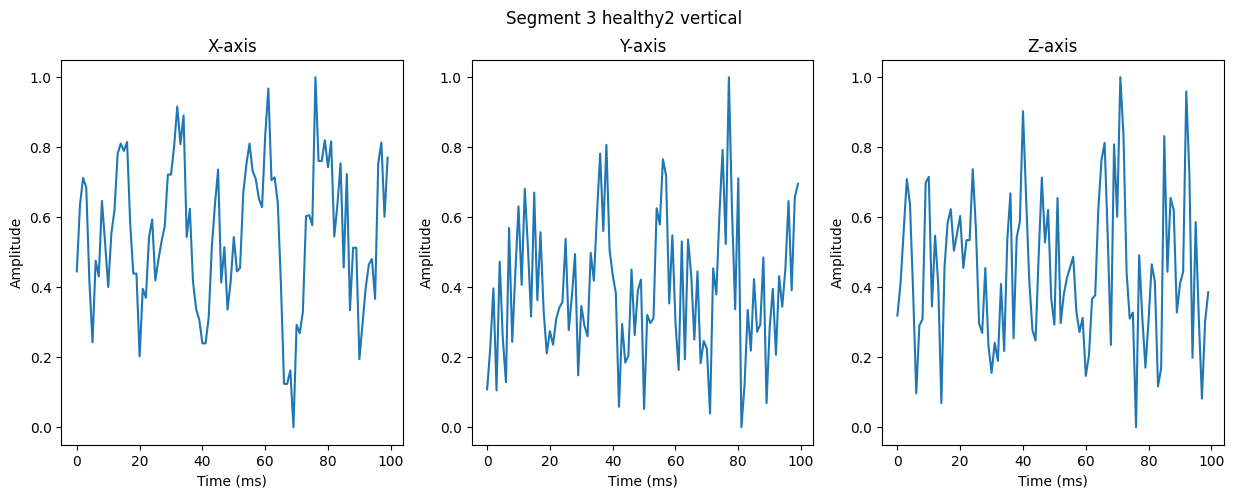

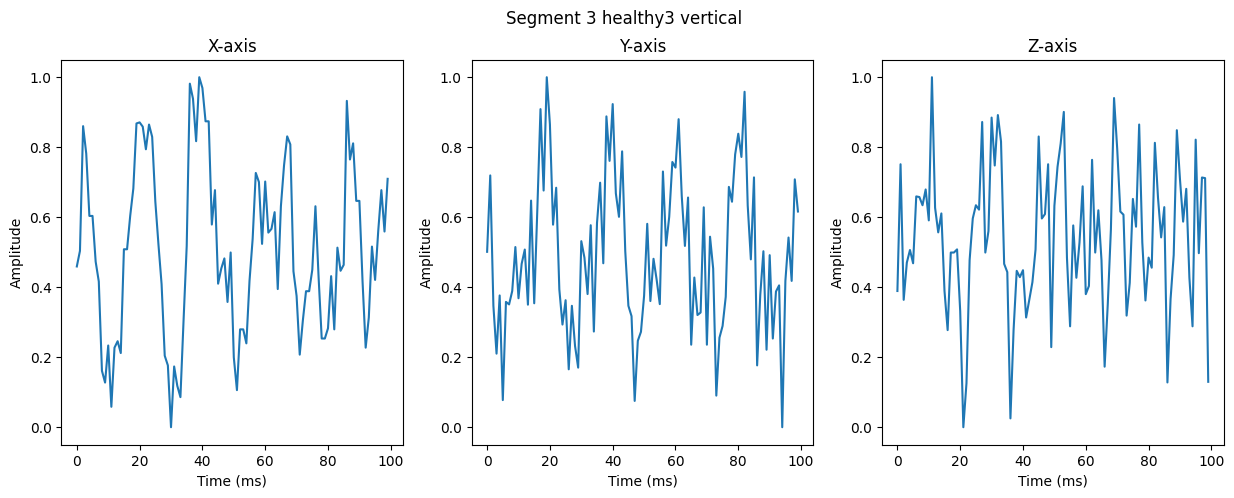

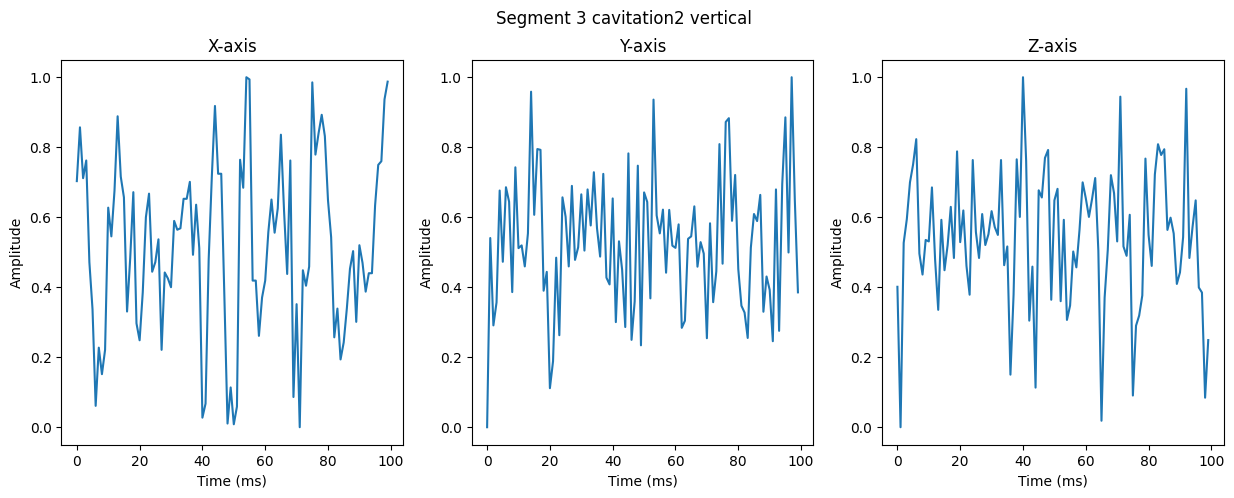

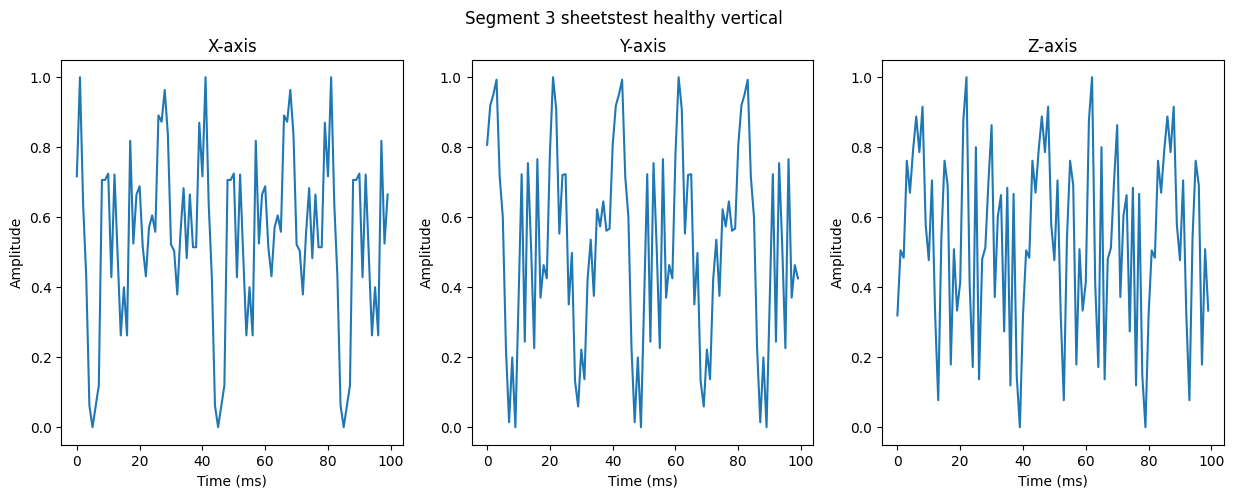

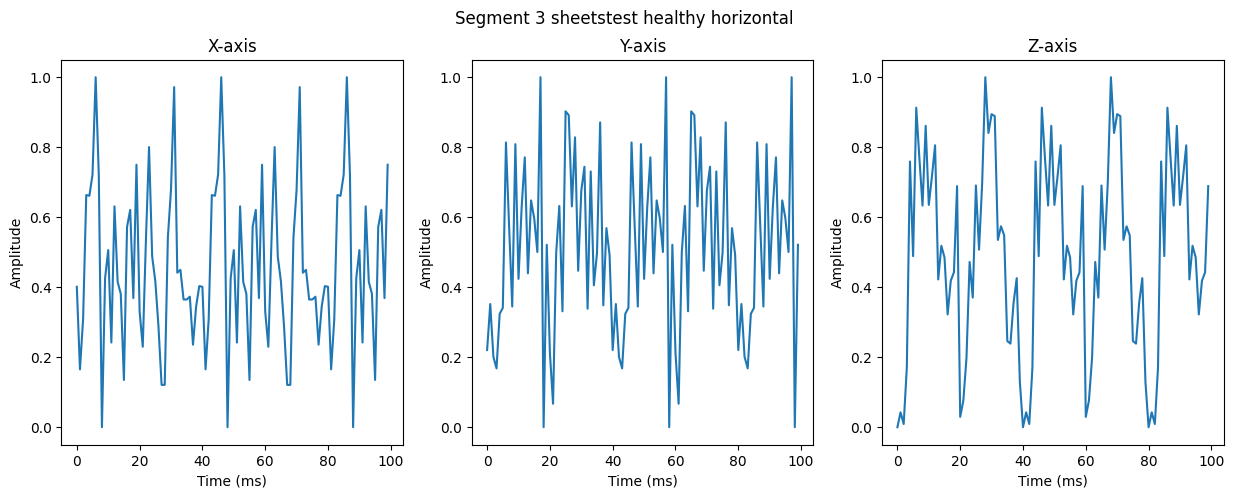

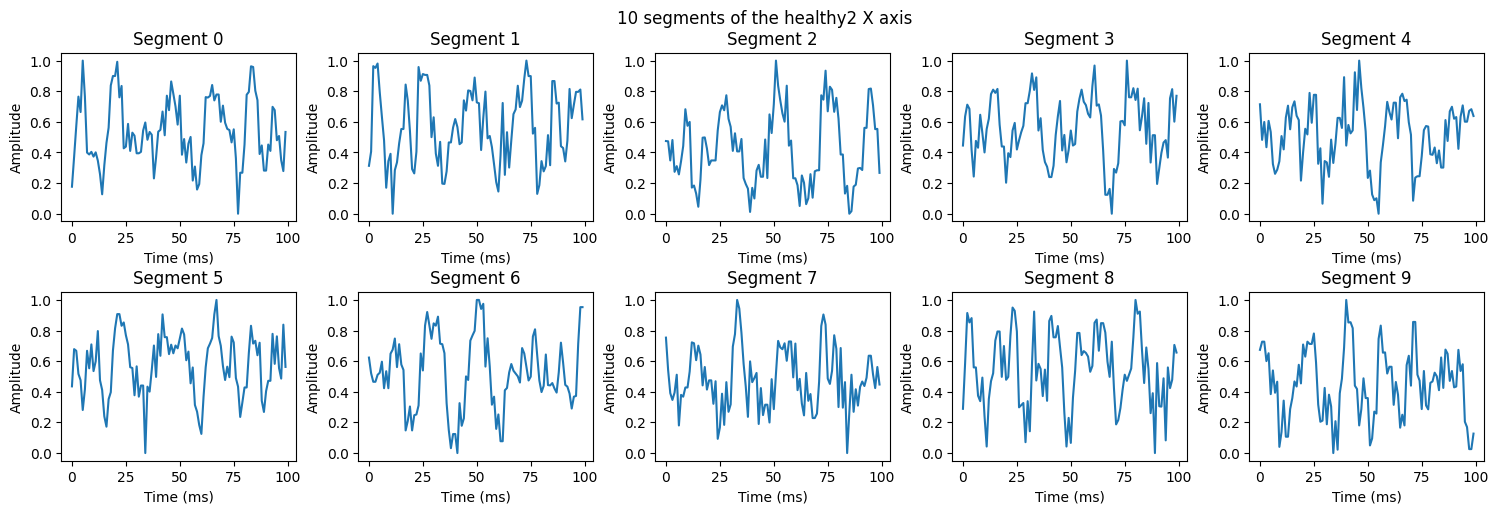

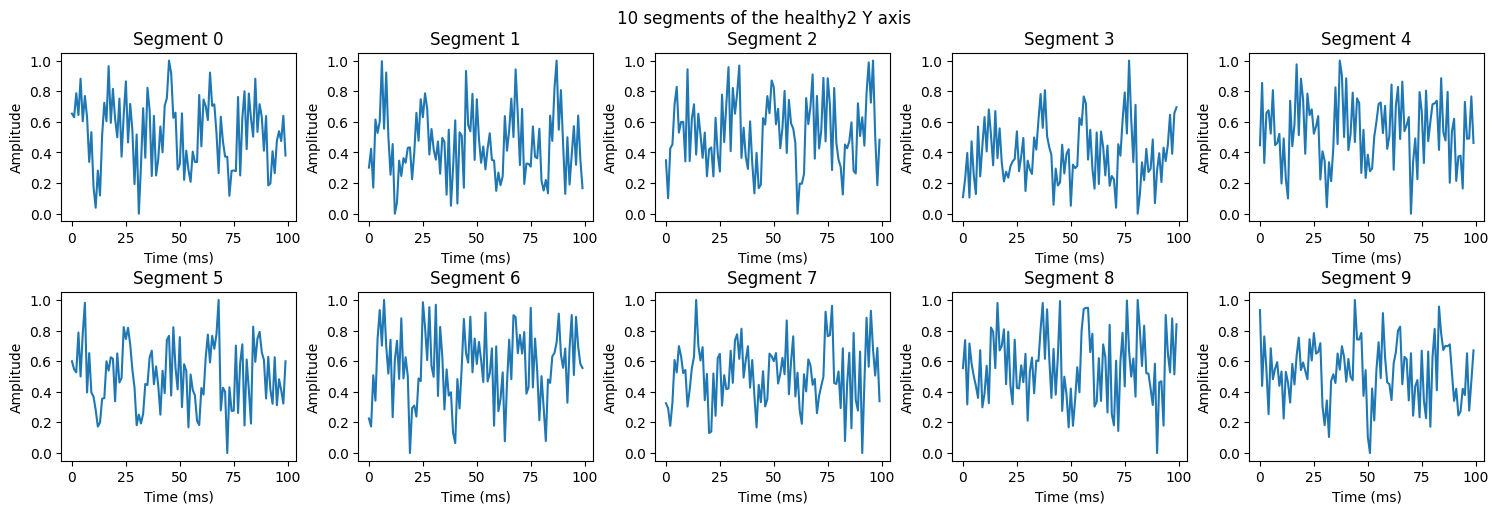

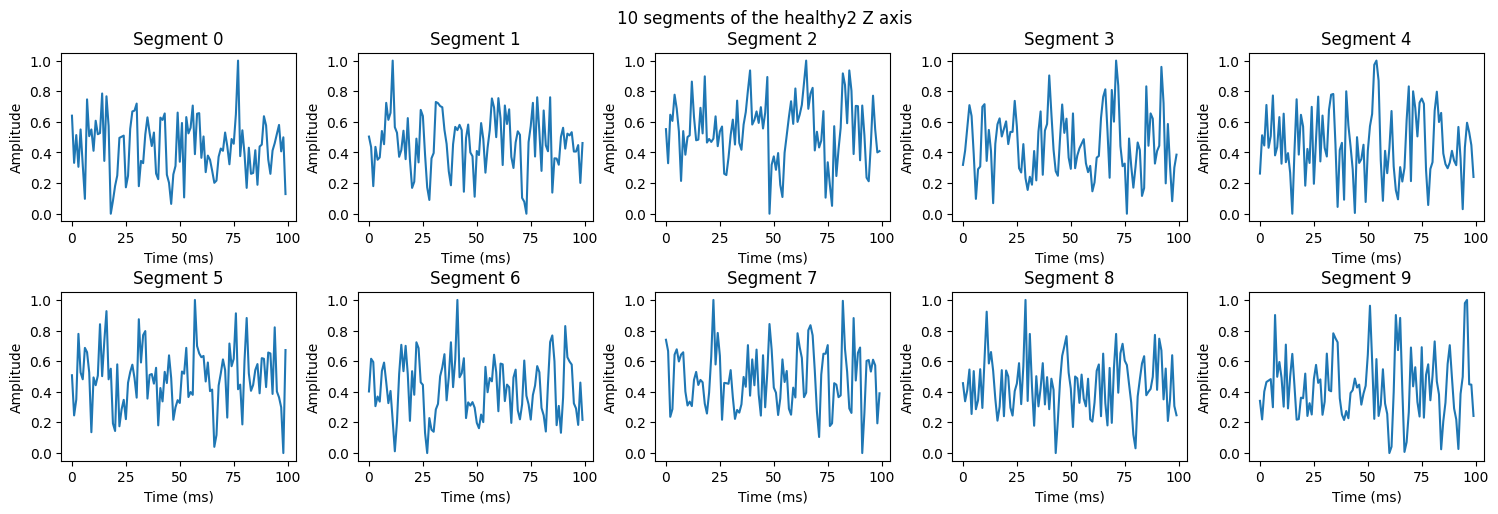

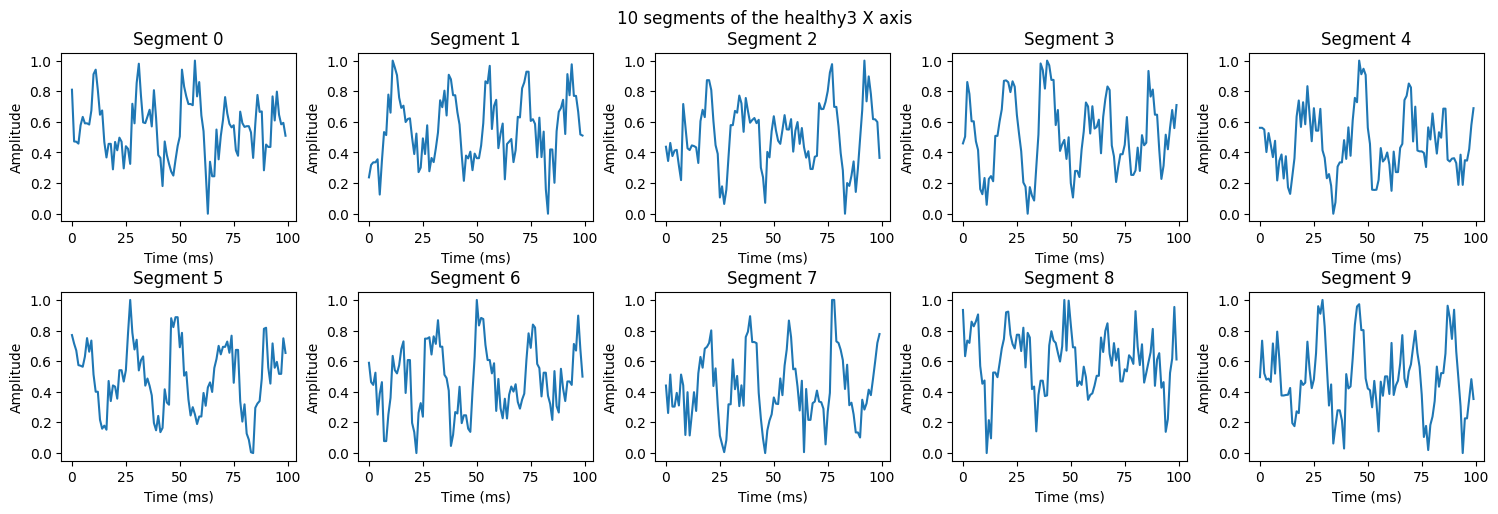

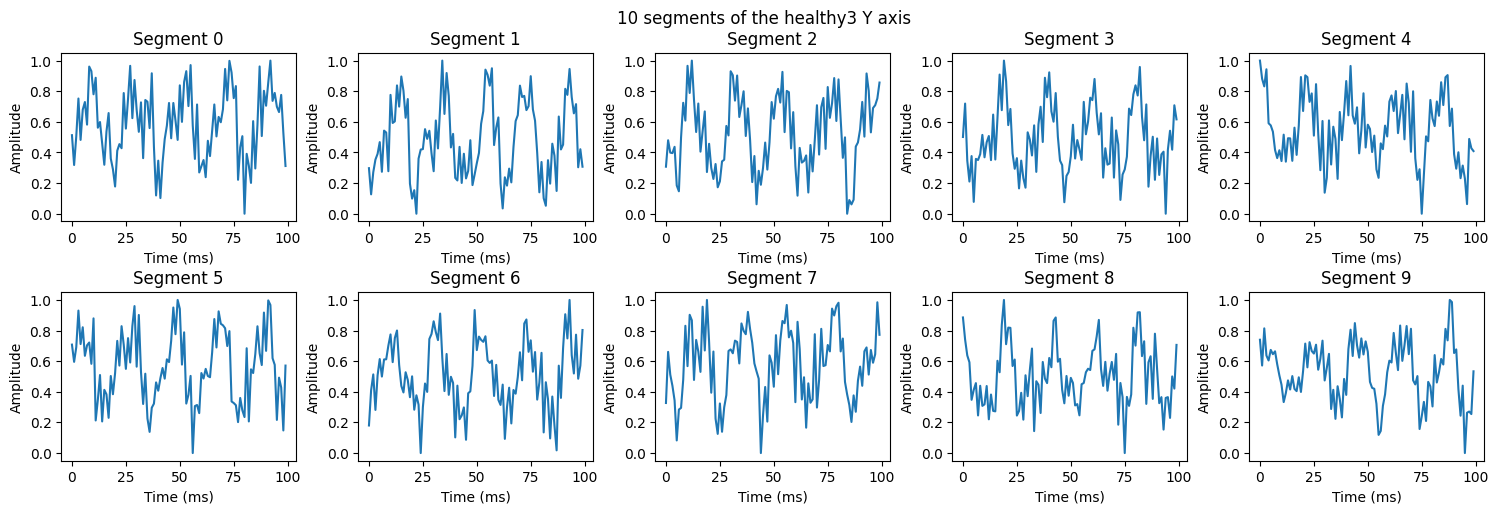

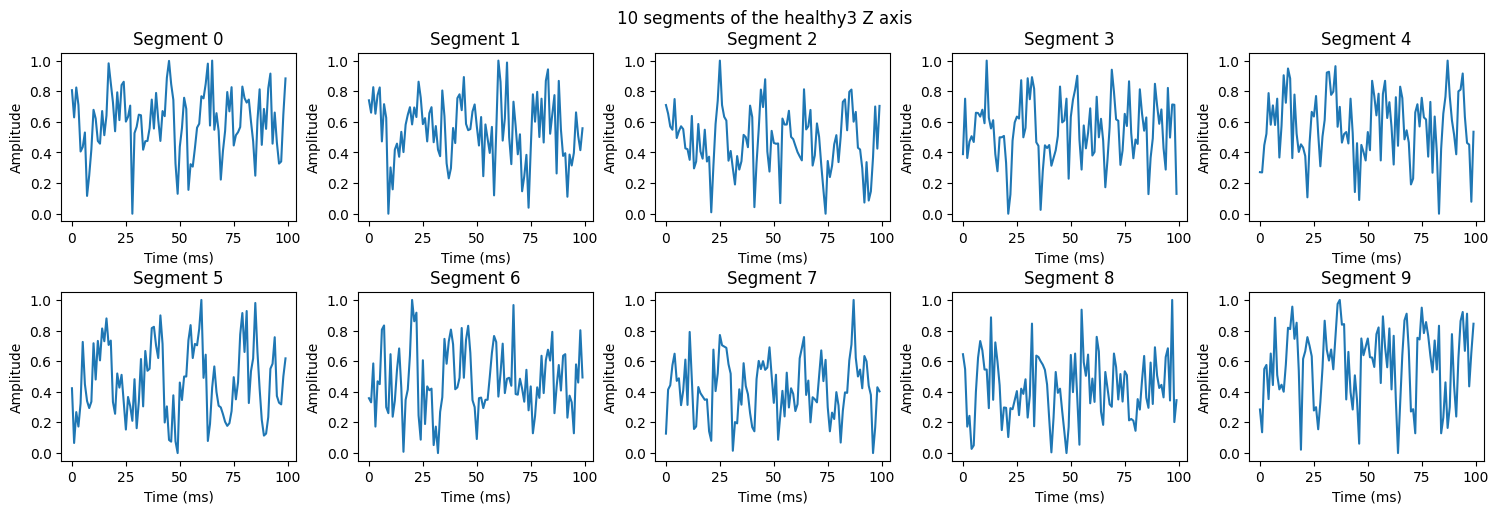

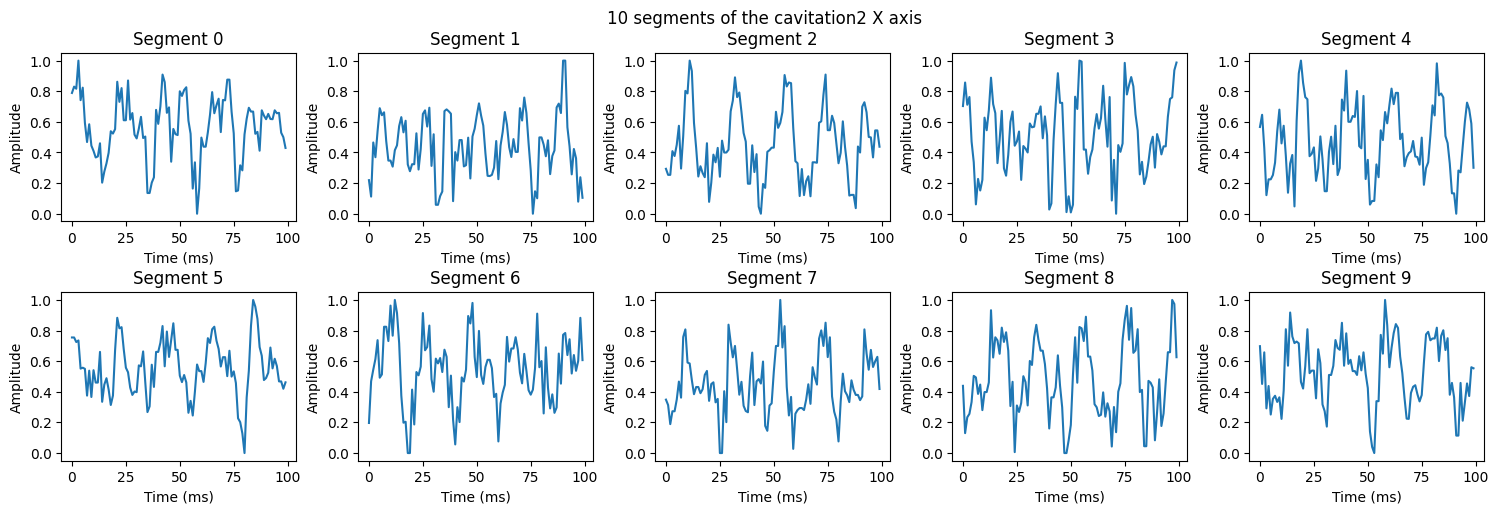

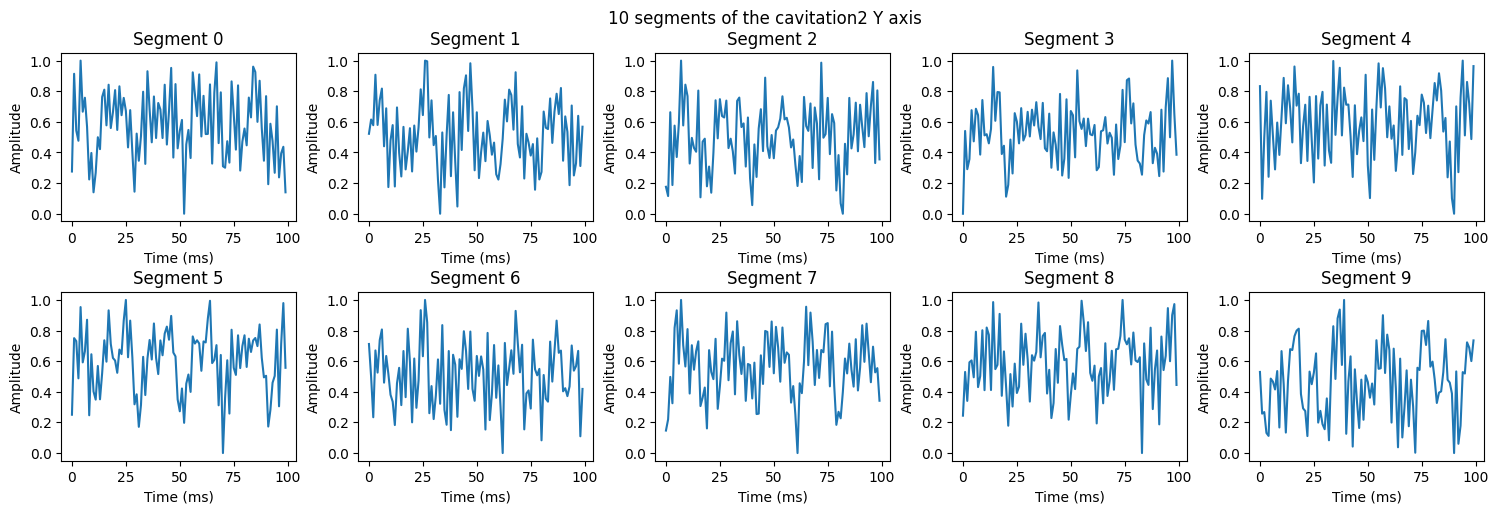

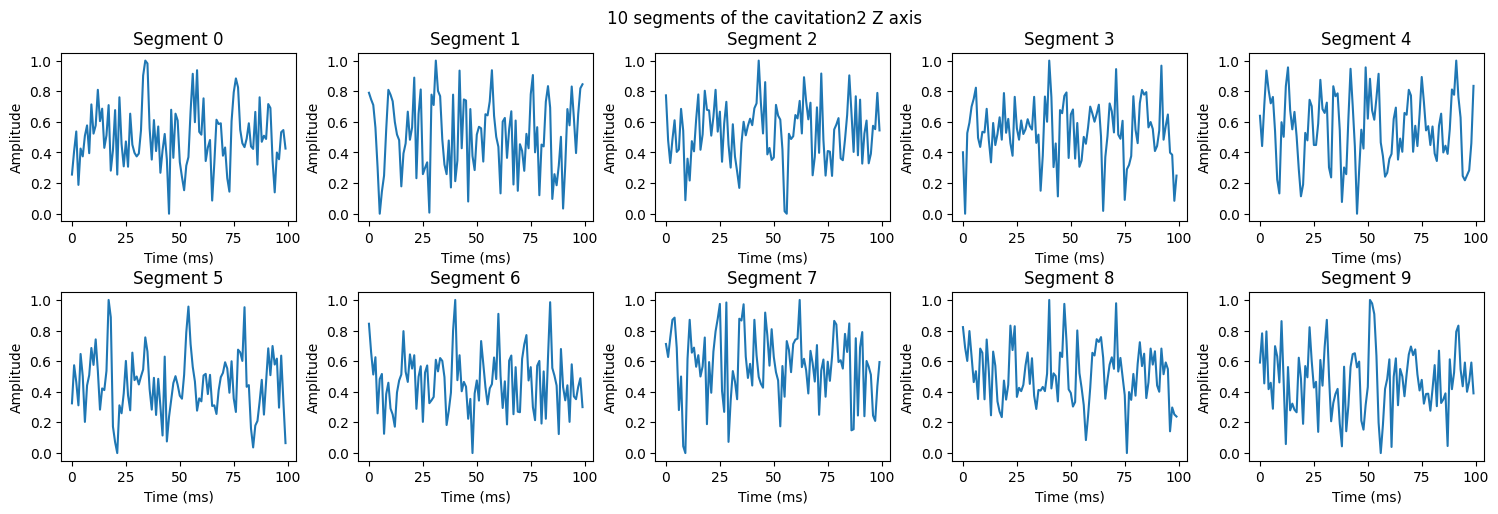

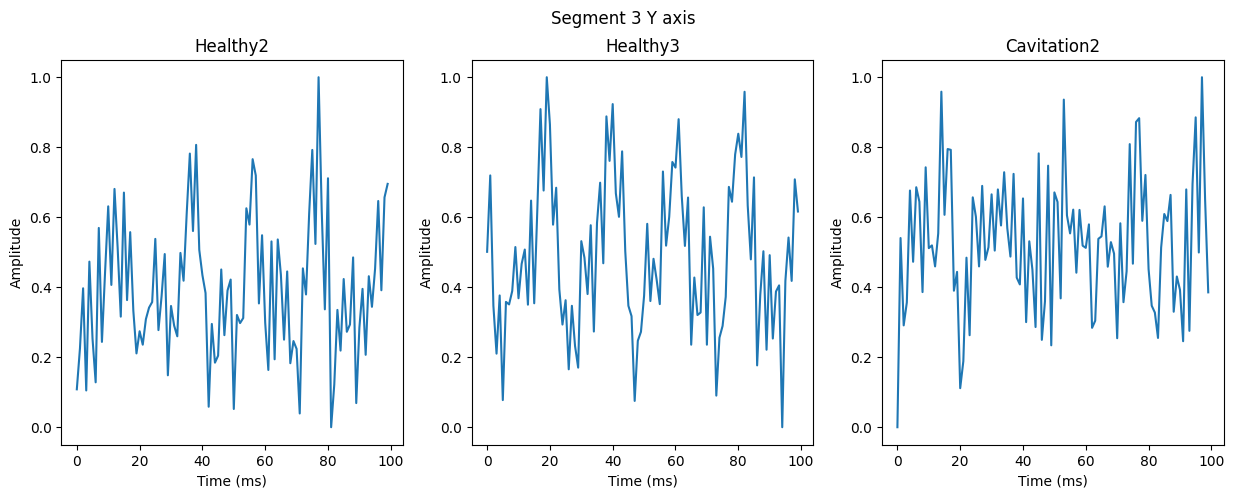

In [81]:
#visualize all the data here
def plot_10_segments(data, title, duration, axis):
    time = np.arange(0, duration, duration/data.shape[2])
    
    if (axis == "X"):
        data = data[0]
    elif (axis == "Y"):
        data = data[1]
    elif (axis == "Z"):
        data = data[2]
    else:
        print("Invalid axis, must be X, Y or Z")
        return
    
    fig, axs = plt.subplots(2, 5, figsize=(15, 5))
    
    fig.suptitle("10 segments of the " + title + " " + axis + " axis")
    fig.tight_layout(h_pad=3.0)
    
    for i in range(2):
        for j in range(5):
            axs[i, j].plot(time, data[i*5 + j])
            axs[i, j].set_title('Segment {}'.format(i*5 + j))
            axs[i, j].set_xlabel('Time (ms)')
            axs[i, j].set_ylabel('Amplitude')
    

def plot_axes(data, segment_index, duration, title):
    if segment_index < 0 or segment_index >= data.shape[1]:
        raise ValueError("Invalid segment_index, must be in range [0, {})".format(data.shape[1]))
    
    time = np.arange(0, duration, duration/data.shape[2])
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Segment {}'.format(segment_index)  + " " + title)
    
    ax1.plot(time, data[0, segment_index, :])
    ax1.set_title('X-axis')
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Amplitude')

    ax2.plot(time, data[1, segment_index, :])
    ax2.set_title('Y-axis')
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('Amplitude')

    ax3.plot(time, data[2, segment_index, :])
    ax3.set_title('Z-axis')
    ax3.set_xlabel('Time (ms)')
    ax3.set_ylabel('Amplitude')

    plt.show()


plot_axes(data_healthy2_vert_normalised, 3, duration, "healthy2 vertical")
plot_axes(data_healthy3_vert_normalised, 3, duration, "healthy3 vertical")
plot_axes(data_cavitation2_vert_normalised, 3, duration, "cavitation2 vertical")
plot_axes(data_sheetstest_healthy_vert_normalised, 3, duration, "sheetstest healthy vertical")
plot_axes(data_sheetstest_healthy_hori_normalised, 3, duration, "sheetstest healthy horizontal")

plot_10_segments(data_healthy2_vert_normalised, "healthy2", duration, "X")
plot_10_segments(data_healthy2_vert_normalised, "healthy2", duration, "Y")
plot_10_segments(data_healthy2_vert_normalised, "healthy2", duration, "Z")

plot_10_segments(data_healthy3_vert_normalised, "healthy3", duration, "X")
plot_10_segments(data_healthy3_vert_normalised, "healthy3", duration, "Y")
plot_10_segments(data_healthy3_vert_normalised, "healthy3", duration, "Z")

plot_10_segments(data_cavitation2_vert_normalised, "cavitation2", duration, "X")
plot_10_segments(data_cavitation2_vert_normalised, "cavitation2", duration, "Y")
plot_10_segments(data_cavitation2_vert_normalised, "cavitation2", duration, "Z")

# plot one segment of healthy2 vertical Y axis vs healthy3 vertical Y axis vs cavitation2 vertical Y axis
def plot_one_segment(data1, data2, data3, segment_index, duration, title):
    if segment_index < 0 or segment_index >= data1.shape[1]:
        raise ValueError("Invalid segment_index, must be in range [0, {})".format(data1.shape[1]))
    
    time = np.arange(0, duration, duration/data1.shape[2])
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Segment {}'.format(segment_index)  + " " + title)
    
    ax1.plot(time, data1[1, segment_index, :])
    ax1.set_title('Healthy2')
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Amplitude')

    ax2.plot(time, data2[1, segment_index, :])
    ax2.set_title('Healthy3')
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('Amplitude')

    ax3.plot(time, data3[1, segment_index, :])
    ax3.set_title('Cavitation2')
    ax3.set_xlabel('Time (ms)')
    ax3.set_ylabel('Amplitude')

    plt.show()

plot_one_segment(data_healthy2_vert_normalised, data_healthy3_vert_normalised, data_cavitation2_vert_normalised, 3, duration, "Y axis")

#### Testing of Google sheets data against TFLite micro built using healthy2 and healthy3 separately (Y-axis)


In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, LeakyReLU, Conv1D, MaxPooling1D, UpSampling1D
from keras.optimizers import Adam, Nadam
from keras.callbacks import EarlyStopping
from keras.losses import mse as mse_loss
from keras import Sequential
from keras.layers import Dropout
from keras.regularizers import l1, l2

X_train_healthy2_vert_y_axis, X_test_healthy2_vert_y_axis = train_test_split(data_healthy2_vert_normalised[1], test_size=0.20, random_state=42)
X_train_healthy3_vert_y_axis, X_test_healthy3_vert_y_axis = train_test_split(data_healthy3_vert_normalised[1], test_size=0.20, random_state=42)
X_train_healthy2_vert_3axis, X_test_healthy2_vert_3axis = train_test_split(data_healthy2_vert_normalised_transposed, test_size=0.20, random_state=42)
X_train_healthy3_vert_3axis, X_test_healthy3_vert_3axis = train_test_split(data_healthy3_vert_normalised_transposed, test_size=0.20, random_state=42)
X_train_healthy2_6axis, X_test_healthy2_6axis = train_test_split(data_healthy2_6axis_normalized_combined, test_size=0.20, random_state=42)
X_train_healthy3_6axis, X_test_healthy3_6axis = train_test_split(data_healthy3_6axis_normalized_combined, test_size=0.20, random_state=42)

In [85]:
# For evaluating TFLite micro models against the test data
def evaluate_model_y_axis(interpreter, dataset, calculated_threshold):
    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    num_test_samples = dataset.shape[0]
    # print("Dataset shape: ", dataset.shape)

    # Run predictions on every set in the "test" dataset.
    reconstructed_data = []
    for i in range(num_test_samples):

        # Pre-processing the data to fit it with the model's input.
        input_data = np.array(dataset[i], dtype=np.float32)
        # print("Input data shape:", input_data.shape)
        input_data = np.expand_dims(input_data, axis=0)
        # print("Input data shape after expand_dims:", input_data.shape)
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Run inference.
        interpreter.invoke()

        # Post-processing: remove batch dimension and find the digit with highest
        # probability.
        output_data = interpreter.get_tensor(output_details[0]['index'])
        reconstructed_data.append(output_data[0])

    # Convert to numpy array from list for easier comparison
    reconstructed_data = np.array(reconstructed_data)

    mse = np.mean(np.power(dataset - reconstructed_data, 2), axis=1)

    anorm_count = 0
    for i in range(num_test_samples):
        if mse[i] > calculated_threshold:
            anorm_count += 1
    
    return np.array(reconstructed_data), mse, anorm_count

In [84]:
import tensorflow as tf

# original_healthy_data = original_data_healthy_vert_normalised[1]
# original_unhealthy_data = original_data_unhealthy_vert_normalised[1]

healthy2_data_y_axis = data_healthy2_vert_normalised[1];
healthy3_data_y_axis = data_healthy3_vert_normalised[1];
test_healthy_data_y_axis = data_sheetstest_healthy_vert_normalised[1]

# Initial threshold value obtained
healthy2_threshold_yaxis = 0.004144943158984084
healthy3_threshold_yaxis = 0.003793548323369915

# Passing the full integer quantized TF Lite model to the y axis interpreters
healthy2_interpreter_y_axis = tf.lite.Interpreter('Healthy2_model_fullint_quantized_y_axis.tflite')
healthy3_interpreter_y_axis = tf.lite.Interpreter('Healthy3_model_fullint_quantized_y_axis.tflite')

# Allocating tensors.
healthy2_interpreter_y_axis.allocate_tensors()
healthy3_interpreter_y_axis.allocate_tensors()

# Testing using healthy2 model as baseline
print("Testing using the healthy2 model as baseline model")
_, mse_healthy2_y_axis, _ = evaluate_model_y_axis(healthy2_interpreter_y_axis, X_test_healthy2_vert_y_axis, healthy2_threshold_yaxis)
# Calculate the threshold for the healthy2 TF Lite model
calculated_healthy2_y_axis_threshold = np.percentile(mse_healthy2_y_axis, 95)
print("Calculated threshold for healthy2 model: ", calculated_healthy2_y_axis_threshold)
# Testing using the calculated threshold for the healthy2 TF Lite model
_, _, anorm_count_test_y_axis = evaluate_model_y_axis(healthy2_interpreter_y_axis, test_healthy_data_y_axis, calculated_healthy2_y_axis_threshold)
_, _, anorm_count_healthy2_y_axis = evaluate_model_y_axis(healthy2_interpreter_y_axis, healthy2_data_y_axis, calculated_healthy2_y_axis_threshold)
_, _, anorm_count_healthy3_y_axis = evaluate_model_y_axis(healthy2_interpreter_y_axis, healthy3_data_y_axis, calculated_healthy2_y_axis_threshold)

print("Number of anomalies in baseline (healthy2) data:", anorm_count_healthy2_y_axis, "out of", healthy2_data_y_axis.shape[0], "samples")
print("Anomalies in baseline (healthy2) data:", (anorm_count_healthy2_y_axis / healthy2_data_y_axis.shape[0]) * 100, "%")

print("Number of anomalies in healthy3 data:", anorm_count_healthy3_y_axis, "out of", healthy3_data_y_axis.shape[0], "samples")
print("Anomalies in healthy3 data:", (anorm_count_healthy3_y_axis / healthy3_data_y_axis.shape[0]) * 100, "%")

print("Number of anomalies in test healthy data:", anorm_count_test_y_axis, "out of", test_healthy_data_y_axis.shape[0], "samples")
print("Anomalies in test healthy data:", (anorm_count_test_y_axis / test_healthy_data_y_axis.shape[0]) * 100, "%")
print("--------------------------------------------------")

# Testing using healthy3 model as baseline
print("Testing using the healthy3 model as baseline model")
_, mse_healthy3_y_axis, _ = evaluate_model_y_axis(healthy3_interpreter_y_axis, X_test_healthy3_vert_y_axis, healthy3_threshold_yaxis)
# Calculate the threshold for the healthy3 TF Lite model
calculated_healthy3_y_axis_threshold = np.percentile(mse_healthy3_y_axis, 95)
print("Calculated threshold for healthy3 model: ", calculated_healthy3_y_axis_threshold)
# Testing using the calculated threshold for the healthy3 TF Lite model
_, _, anorm_count_test_y_axis = evaluate_model_y_axis(healthy3_interpreter_y_axis, test_healthy_data_y_axis, calculated_healthy3_y_axis_threshold)
_, _, anorm_count_healthy2_y_axis = evaluate_model_y_axis(healthy3_interpreter_y_axis, healthy2_data_y_axis, calculated_healthy3_y_axis_threshold)
_, _, anorm_count_healthy3_y_axis = evaluate_model_y_axis(healthy3_interpreter_y_axis, healthy3_data_y_axis, calculated_healthy3_y_axis_threshold)

print("Number of anomalies in baseline (healthy3) data:", anorm_count_healthy3_y_axis, "out of", healthy3_data_y_axis.shape[0], "samples")
print("Anomalies in baseline (healthy3) data:", (anorm_count_healthy3_y_axis / healthy3_data_y_axis.shape[0]) * 100, "%")

print("Number of anomalies in healthy2 data:", anorm_count_healthy2_y_axis, "out of", healthy2_data_y_axis.shape[0], "samples")
print("Anomalies in healthy2 data:", (anorm_count_healthy2_y_axis / healthy2_data_y_axis.shape[0]) * 100, "%")

print("Number of anomalies in test healthy data:", anorm_count_test_y_axis, "out of", test_healthy_data_y_axis.shape[0], "samples")
print("Anomalies in test healthy data:", (anorm_count_test_y_axis / test_healthy_data_y_axis.shape[0]) * 100, "%")
print("--------------------------------------------------")

Testing using the healthy2 model as baseline model
Calculated threshold for healthy2 model:  0.0044719922139342125
Number of anomalies in baseline (healthy2) data: 2344 out of 49000 samples
Anomalies in baseline (healthy2) data: 4.783673469387755 %
Number of anomalies in healthy3 data: 1496 out of 49000 samples
Anomalies in healthy3 data: 3.0530612244897957 %
Number of anomalies in test healthy data: 27885 out of 30000 samples
Anomalies in test healthy data: 92.95 %
--------------------------------------------------
Testing using the healthy3 model as baseline model
Calculated threshold for healthy3 model:  0.0042373094281111445
Number of anomalies in baseline (healthy3) data: 2382 out of 49000 samples
Anomalies in baseline (healthy3) data: 4.8612244897959185 %
Number of anomalies in healthy2 data: 7198 out of 49000 samples
Anomalies in healthy2 data: 14.689795918367347 %
Number of anomalies in test healthy data: 28076 out of 30000 samples
Anomalies in test healthy data: 93.58666666666

#### Testing of Google sheets data against TFLite micro built using healthy2 and healthy3 separately (6-axis)

In [106]:
# For evaluating TFLite micro models against the test data
def evaluate_model_6axis(interpreter, dataset, calculated_threshold):
    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    num_test_samples = dataset.shape[0]
    # print("Dataset shape: ", dataset.shape)

    # Run predictions on every set in the "test" dataset.
    reconstructed_data = []
    for i in range(num_test_samples):

        # Pre-processing the data to fit it with the model's input.
        input_data = np.array(dataset[i], dtype=np.float32)
        # print("Input data shape:", input_data.shape)
        input_data = np.expand_dims(input_data, axis=0)
        # print("Input data shape after expand_dims:", input_data.shape)
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Run inference.
        interpreter.invoke()

        # Post-processing: remove batch dimension and find the digit with highest
        # probability.
        output_data = interpreter.get_tensor(output_details[0]['index'])
        reconstructed_data.append(output_data[0])

    # Convert to numpy array from list for easier comparison
    reconstructed_data = np.array(reconstructed_data)

    mse = np.mean(np.power(dataset - reconstructed_data, 2), axis=1)

    anorm_count = 0
    for i in range(num_test_samples):
        if mse[i] > calculated_threshold:
            anorm_count += 1
    
    return np.array(reconstructed_data), mse, anorm_count

In [107]:
import tensorflow as tf

# original_healthy_data = original_data_healthy_vert_normalised[1]
# original_unhealthy_data = original_data_unhealthy_vert_normalised[1]

healthy2_data_6axis = data_healthy2_6axis_normalized_combined
healthy3_data_6axis = data_healthy3_6axis_normalized_combined
test_healthy_data_6axis = data_sheetstest_healthy_6axis_normalised_combined

# Initial threshold value obtained
healthy2_threshold_6axis = 0.015604946092416862
healthy3_threshold_6axis = 0.01470947407466999

# Passing the full integer quantized TF Lite model to the y axis interpreters
healthy2_interpreter_6axis = tf.lite.Interpreter('Healthy2_model_fullint_quantized_6axis.tflite')
healthy3_interpreter_6axis = tf.lite.Interpreter('Healthy3_model_fullint_quantized_6axis.tflite')

# Allocating tensors.
healthy2_interpreter_6axis.allocate_tensors()
healthy3_interpreter_6axis.allocate_tensors()

# Testing using healthy2 model as baseline
print("Testing using the healthy2 model as baseline model")
_, mse_healthy2_6axis, _ = evaluate_model_6axis(healthy2_interpreter_6axis, X_test_healthy2_6axis, healthy2_threshold_6axis)
# Calculate the threshold for the healthy2 TF Lite model
calculated_healthy2_6axis_threshold = np.percentile(mse_healthy2_6axis, 95)
print("Calculated threshold for healthy2 model: ", calculated_healthy2_6axis_threshold)
# Testing using the calculated threshold for the healthy2 TF Lite model
_, _, anorm_count_test_6axis = evaluate_model_6axis(healthy2_interpreter_6axis, test_healthy_data_6axis, calculated_healthy2_6axis_threshold)
_, _, anorm_count_healthy2_6axis = evaluate_model_6axis(healthy2_interpreter_6axis, healthy2_data_6axis, calculated_healthy2_6axis_threshold)
_, _, anorm_count_healthy3_6axis = evaluate_model_6axis(healthy2_interpreter_6axis, healthy3_data_6axis, calculated_healthy2_6axis_threshold)

print("Number of anomalies in baseline (healthy2) data:", anorm_count_healthy2_6axis, "out of", healthy2_data_6axis.shape[0], "samples")
print("Anomalies in baseline (healthy2) data:", (anorm_count_healthy2_6axis / healthy2_data_6axis.shape[0]) * 100, "%")

print("Number of anomalies in healthy3 data:", anorm_count_healthy3_6axis, "out of", healthy3_data_6axis.shape[0], "samples")
print("Anomalies in healthy3 data:", (anorm_count_healthy3_6axis / healthy3_data_6axis.shape[0]) * 100, "%")

print("Number of anomalies in test healthy data:", anorm_count_test_6axis, "out of", test_healthy_data_6axis.shape[0], "samples")
print("Anomalies in test healthy data:", (anorm_count_test_6axis / test_healthy_data_6axis.shape[0]) * 100, "%")
print("--------------------------------------------------")

# Testing using healthy3 model as baseline
print("Testing using the healthy3 model as baseline model")
_, mse_healthy3_6axis, _ = evaluate_model_6axis(healthy3_interpreter_6axis, X_test_healthy3_6axis, healthy3_threshold_6axis)
# Calculate the threshold for the healthy3 TF Lite model
calculated_healthy3_6axis_threshold = np.percentile(mse_healthy3_6axis, 95)
print("Calculated threshold for healthy3 model: ", calculated_healthy3_6axis_threshold)
# Testing using the calculated threshold for the healthy3 TF Lite model
_, _, anorm_count_test_6axis = evaluate_model_6axis(healthy3_interpreter_6axis, test_healthy_data_6axis, calculated_healthy3_6axis_threshold)
_, _, anorm_count_healthy2_6axis = evaluate_model_6axis(healthy3_interpreter_6axis, healthy2_data_6axis, calculated_healthy3_6axis_threshold)
_, _, anorm_count_healthy3_6axis = evaluate_model_6axis(healthy3_interpreter_6axis, healthy3_data_6axis, calculated_healthy3_6axis_threshold)

print("Number of anomalies in baseline (healthy3) data:", anorm_count_healthy3_6axis, "out of", healthy3_data_6axis.shape[0], "samples")
print("Anomalies in baseline (healthy3) data:", (anorm_count_healthy3_6axis / healthy3_data_6axis.shape[0]) * 100, "%")

print("Number of anomalies in healthy2 data:", anorm_count_healthy2_6axis, "out of", healthy2_data_6axis.shape[0], "samples")
print("Anomalies in healthy2 data:", (anorm_count_healthy2_6axis / healthy2_data_6axis.shape[0]) * 100, "%")

print("Number of anomalies in test healthy data:", anorm_count_test_6axis, "out of", test_healthy_data_6axis.shape[0], "samples")
print("Anomalies in test healthy data:", (anorm_count_test_6axis / test_healthy_data_6axis.shape[0]) * 100, "%")
print("--------------------------------------------------")

Testing using the healthy2 model as baseline model
Calculated threshold for healthy2 model:  0.015604946092416862
Number of anomalies in baseline (healthy2) data: 2260 out of 49000 samples
Anomalies in baseline (healthy2) data: 4.612244897959183 %
Number of anomalies in healthy3 data: 3691 out of 49000 samples
Anomalies in healthy3 data: 7.532653061224489 %
Number of anomalies in test healthy data: 30000 out of 30000 samples
Anomalies in test healthy data: 100.0 %
--------------------------------------------------
Testing using the healthy3 model as baseline model
Calculated threshold for healthy3 model:  0.01470947407466999
Number of anomalies in baseline (healthy3) data: 2443 out of 49000 samples
Anomalies in baseline (healthy3) data: 4.985714285714286 %
Number of anomalies in healthy2 data: 11003 out of 49000 samples
Anomalies in healthy2 data: 22.455102040816328 %
Number of anomalies in test healthy data: 30000 out of 30000 samples
Anomalies in test healthy data: 100.0 %
----------

#### Testing of Google sheets data against TFLite micro built using healthy2 and healthy3 separately (3-axis)


In [68]:
# For evaluating TFLite micro models against the test data
def evaluate_model_3axis(interpreter, dataset, threshold_x, threshold_y, threshold_z):
    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    num_test_samples = dataset.shape[0]
    # print("Dataset shape: ", dataset.shape)

    # Run predictions on every set in the "test" dataset.
    reconstructed_data = []
    for i in range(num_test_samples):

        # Pre-processing the data to fit it with the model's input.
        input_data = np.array(dataset[i], dtype=np.float32)
        # print("Input data shape:", input_data.shape)
        input_data = np.expand_dims(input_data, axis=0)
        # print("Input data shape after expand_dims:", input_data.shape)
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Run inference.
        interpreter.invoke()

        # Post-processing: remove batch dimension and find the digit with highest
        # probability.
        output_data = interpreter.get_tensor(output_details[0]['index'])
        reconstructed_data.append(output_data[0])

    # Convert to numpy array from list for easier comparison
    reconstructed_data = np.array(reconstructed_data)
    # print("Reconstructed data shape:", reconstructed_data.shape)
    
    # Split data into the 3 separate axis for calculations
    dataset_x = dataset[:, 0, :]
    dataset_y = dataset[:, 1, :]
    dataset_z = dataset[:, 2, :]
    reconstructed_data_x = reconstructed_data[:, 0, :]
    reconstructed_data_y = reconstructed_data[:, 1, :]
    reconstructed_data_z = reconstructed_data[:, 2, :]
    # print("Reconstructed data shape (X-axis):", reconstructed_data_x.shape)
    
    mse_x = np.mean(np.power(dataset_x - reconstructed_data_x, 2), axis=1)
    mse_y = np.mean(np.power(dataset_y - reconstructed_data_y, 2), axis=1)
    mse_z = np.mean(np.power(dataset_z - reconstructed_data_z, 2), axis=1)
    # print("MSE shape (X-axis):", mse_x.shape)
    # print("MSE value of 1st element (X-axis):", mse_x[0])

    anorm_count_x = 0
    for i in range(num_test_samples):
        if mse_x[i] > threshold_x:
            anorm_count_x += 1
            
    anorm_count_y = 0
    for i in range(num_test_samples):
        if mse_y[i] > threshold_y:
            anorm_count_y += 1
            
    anorm_count_z = 0
    for i in range(num_test_samples):
        if mse_z[i] > threshold_z:
            anorm_count_z += 1
    
    return reconstructed_data, mse_x, anorm_count_x, mse_y, anorm_count_y, mse_z, anorm_count_z

# Testing the TFLite micro models to ensure accruacy not impacted
test_data_3axis = data_sheetstest_healthy_vert_normalised_transposed
healthy2_data_3axis = data_healthy2_vert_normalised_transposed
healthy3_data_3axis = data_healthy3_vert_normalised_transposed
cavitation2_data_3axis = data_cavitation2_vert_normalised_transposed

# Passing the full integer quantized TF Lite model to the interpreters.
healthy2_interpreter_3axis = tf.lite.Interpreter('Healthy2_model_fullint_quantized_3axis.tflite')
healthy3_interpreter_3axis = tf.lite.Interpreter('Healthy3_model_fullint_quantized_3axis.tflite')

# Allocating tensors.
healthy2_interpreter_3axis.allocate_tensors()
healthy3_interpreter_3axis.allocate_tensors()

# Initial threshold value obtained
threshold_healthy2_3axis_x = 0.01101209393270988
threshold_healthy2_3axis_y = 0.011936521356938902
threshold_healthy2_3axis_z = 0.017025637202126558
threshold_healthy3_3axis_x = 0.01216266713049031
threshold_healthy3_3axis_y = 0.009781862443089774
threshold_healthy3_3axis_z = 0.016663540428294214

# Testing using the healthy2 model as basline model
print("Testing using the healthy2 model as baseline model")
_, mse_baseline_3axis_x, _, mse_baseline_3axis_y, _, mse_baseline_3axis_z, _ = evaluate_model_3axis(healthy2_interpreter_3axis, X_test_healthy2_vert_3axis, threshold_healthy2_3axis_x, threshold_healthy2_3axis_y, threshold_healthy2_3axis_z)
# Calculate the threshold for the healthy2 TF Lite model for each axis
calculated_threshold_healthy2_3axis_x = np.percentile(mse_baseline_3axis_x, 95)
calculated_threshold_healthy2_3axis_y = np.percentile(mse_baseline_3axis_y, 95)
calculated_threshold_healthy2_3axis_z = np.percentile(mse_baseline_3axis_z, 95)
print("Calculated threshold for healthy2 model (X-axis): ", calculated_threshold_healthy2_3axis_x)
print("Calculated threshold for healthy2 model (Y-axis): ", calculated_threshold_healthy2_3axis_y)
print("Calculated threshold for healthy2 model (Z-axis): ", calculated_threshold_healthy2_3axis_z)

# Testing using the calculated threshold for the healthy2 TF Lite model
recon_test_from_healthy2_3axis, _, anorm_count_test_data_3axis_x, _, anorm_count_test_data_3axis_y, _, anorm_count_test_data_3axis_z  = evaluate_model_3axis(healthy2_interpreter_3axis, test_data_3axis, calculated_threshold_healthy2_3axis_x, calculated_threshold_healthy2_3axis_y, calculated_threshold_healthy2_3axis_z)
recon_healthy2_from_healthy2_3axis, _, anorm_count_healthy2_3axis_x, _, anorm_count_healthy2_3axis_y, _, anorm_count_healthy2_3axis_z = evaluate_model_3axis(healthy2_interpreter_3axis, healthy2_data_3axis, calculated_threshold_healthy2_3axis_x, calculated_threshold_healthy2_3axis_y, calculated_threshold_healthy2_3axis_z)
recon_healthy3_from_healthy2_3axis, _, anorm_count_healthy3_3axis_x, _, anorm_count_healthy3_3axis_y, _, anorm_count_healthy3_3axis_z = evaluate_model_3axis(healthy2_interpreter_3axis, healthy3_data_3axis, calculated_threshold_healthy2_3axis_x, calculated_threshold_healthy2_3axis_y, calculated_threshold_healthy2_3axis_z)

print("Number of anomalies in baseline (healthy2) data (X-axis):", anorm_count_healthy2_3axis_x, "out of", healthy2_data_3axis.shape[0], "samples")
print("Anomalies in baseline (healthy2) data:", (anorm_count_healthy2_3axis_x / healthy2_data_3axis.shape[0]) * 100, "%")
print("Number of anomalies in baseline (healthy2) data (Y-axis):", anorm_count_healthy2_3axis_y, "out of", healthy2_data_3axis.shape[0], "samples")
print("Anomalies in baseline (healthy2) data:", (anorm_count_healthy2_3axis_y / healthy2_data_3axis.shape[0]) * 100, "%")
print("Number of anomalies in baseline (healthy2) data (Z-axis):", anorm_count_healthy2_3axis_z, "out of", healthy2_data_3axis.shape[0], "samples")
print("Anomalies in baseline (healthy2) data:", (anorm_count_healthy2_3axis_z / healthy2_data_3axis.shape[0]) * 100, "%")

print("Number of anomalies in healthy3 data (X-axis):", anorm_count_healthy3_3axis_x, "out of", healthy3_data_3axis.shape[0], "samples")
print("Anomalies in healthy3 data:", (anorm_count_healthy3_3axis_x / healthy3_data_3axis.shape[0]) * 100, "%")
print("Number of anomalies in healthy3 data (Y-axis):", anorm_count_healthy3_3axis_y, "out of", healthy3_data_3axis.shape[0], "samples")
print("Anomalies in healthy3 data:", (anorm_count_healthy3_3axis_y / healthy3_data_3axis.shape[0]) * 100, "%")
print("Number of anomalies in healthy3 data (Z-axis):", anorm_count_healthy3_3axis_z, "out of", healthy3_data_3axis.shape[0], "samples")
print("Anomalies in healthy3 data:", (anorm_count_healthy3_3axis_z / healthy3_data_3axis.shape[0]) * 100, "%")

print("Number of anomalies in original healthy data (X-axis):", anorm_count_test_data_3axis_x, "out of", test_data_3axis.shape[0], "samples")
print("Anomalies in original healthy data:", (anorm_count_test_data_3axis_x / test_data_3axis.shape[0]) * 100, "%")
print("Number of anomalies in original healthy data (Y-axis):", anorm_count_test_data_3axis_y, "out of", test_data_3axis.shape[0], "samples")
print("Anomalies in original healthy data:", (anorm_count_test_data_3axis_y / test_data_3axis.shape[0]) * 100, "%")
print("Number of anomalies in original healthy data (Z-axis):", anorm_count_test_data_3axis_z, "out of", test_data_3axis.shape[0], "samples")
print("Anomalies in original healthy data:", (anorm_count_test_data_3axis_z / test_data_3axis.shape[0]) * 100, "%")
print("--------------------------------------------------")

# Testing using the healthy3 model as basline model
print("Testing using the healthy3 model as baseline model")
_, mse_baseline_3axis_x, _, mse_baseline_3axis_y, _, mse_baseline_3axis_z, _ = evaluate_model_3axis(healthy3_interpreter_3axis, X_test_healthy3_vert_3axis, threshold_healthy3_3axis_x, threshold_healthy3_3axis_y, threshold_healthy3_3axis_z)
# Calculate the threshold for the healthy3 TF Lite model for each axis
calculated_threshold_healthy3_3axis_x = np.percentile(mse_baseline_3axis_x, 95)
calculated_threshold_healthy3_3axis_y = np.percentile(mse_baseline_3axis_y, 95)
calculated_threshold_healthy3_3axis_z = np.percentile(mse_baseline_3axis_z, 95)
print("Calculated threshold for healthy3 model (X-axis): ", calculated_threshold_healthy3_3axis_x)
print("Calculated threshold for healthy3 model (Y-axis): ", calculated_threshold_healthy3_3axis_y)
print("Calculated threshold for healthy3 model (Z-axis): ", calculated_threshold_healthy3_3axis_z)

# Testing using the calculated threshold for the healthy3 TF Lite model
recon_test_from_healthy3_3axis, _, anorm_count_test_data_3axis_x, _, anorm_count_test_data_3axis_y, _, anorm_count_test_data_3axis_z  = evaluate_model_3axis(healthy3_interpreter_3axis, test_data_3axis, calculated_threshold_healthy3_3axis_x, calculated_threshold_healthy3_3axis_y, calculated_threshold_healthy3_3axis_z)
recon_healthy2_from_healthy3_3axis, _, anorm_count_healthy2_3axis_x, _, anorm_count_healthy2_3axis_y, _, anorm_count_healthy2_3axis_z = evaluate_model_3axis(healthy3_interpreter_3axis, healthy2_data_3axis, calculated_threshold_healthy3_3axis_x, calculated_threshold_healthy3_3axis_y, calculated_threshold_healthy3_3axis_z)
recon_healthy3_from_healthy3_3axis, _, anorm_count_healthy3_3axis_x, _, anorm_count_healthy3_3axis_y, _, anorm_count_healthy3_3axis_z = evaluate_model_3axis(healthy3_interpreter_3axis, healthy3_data_3axis, calculated_threshold_healthy3_3axis_x, calculated_threshold_healthy3_3axis_y, calculated_threshold_healthy3_3axis_z)

print("Number of anomalies in baseline (healthy3) data (X-axis):", anorm_count_healthy3_3axis_x, "out of", healthy3_data_3axis.shape[0], "samples")
print("Anomalies in baseline (healthy3) data:", (anorm_count_healthy3_3axis_x / healthy3_data_3axis.shape[0]) * 100, "%")
print("Number of anomalies in baseline (healthy3) data (Y-axis):", anorm_count_healthy3_3axis_y, "out of", healthy3_data_3axis.shape[0], "samples")
print("Anomalies in baseline (healthy3) data:", (anorm_count_healthy3_3axis_y / healthy3_data_3axis.shape[0]) * 100, "%")
print("Number of anomalies in baseline (healthy3) data (Z-axis):", anorm_count_healthy3_3axis_z, "out of", healthy3_data_3axis.shape[0], "samples")
print("Anomalies in baseline (healthy3) data:", (anorm_count_healthy3_3axis_z / healthy3_data_3axis.shape[0]) * 100, "%")

print("Number of anomalies in healthy2 data (X-axis):", anorm_count_healthy2_3axis_x, "out of", healthy2_data_3axis.shape[0], "samples")
print("Anomalies in healthy2 data:", (anorm_count_healthy2_3axis_x / healthy2_data_3axis.shape[0]) * 100, "%")
print("Number of anomalies in healthy2 data (Y-axis):", anorm_count_healthy2_3axis_y, "out of", healthy2_data_3axis.shape[0], "samples")
print("Anomalies in healthy2 data:", (anorm_count_healthy2_3axis_y / healthy2_data_3axis.shape[0]) * 100, "%")
print("Number of anomalies in healthy2 data (Z-axis):", anorm_count_healthy2_3axis_z, "out of", healthy2_data_3axis.shape[0], "samples")
print("Anomalies in healthy2 data:", (anorm_count_healthy2_3axis_z / healthy2_data_3axis.shape[0]) * 100, "%")

print("Number of anomalies in original healthy data (X-axis):", anorm_count_test_data_3axis_x, "out of", test_data_3axis.shape[0], "samples")
print("Anomalies in original healthy data:", (anorm_count_test_data_3axis_x / test_data_3axis.shape[0]) * 100, "%")
print("Number of anomalies in original healthy data (Y-axis):", anorm_count_test_data_3axis_y, "out of", test_data_3axis.shape[0], "samples")
print("Anomalies in original healthy data:", (anorm_count_test_data_3axis_y / test_data_3axis.shape[0]) * 100, "%")
print("Number of anomalies in original healthy data (Z-axis):", anorm_count_test_data_3axis_z, "out of", test_data_3axis.shape[0], "samples")
print("Anomalies in original healthy data:", (anorm_count_test_data_3axis_z / test_data_3axis.shape[0]) * 100, "%")
print("--------------------------------------------------")




Testing using the healthy2 model as baseline model
Calculated threshold for healthy2 model (X-axis):  0.01101209393270988
Calculated threshold for healthy2 model (Y-axis):  0.011936521356938902
Calculated threshold for healthy2 model (Z-axis):  0.017025637202126558
Number of anomalies in baseline (healthy2) data (X-axis): 2447 out of 49000 samples
Anomalies in baseline (healthy2) data: 4.993877551020408 %
Number of anomalies in baseline (healthy2) data (Y-axis): 2303 out of 49000 samples
Anomalies in baseline (healthy2) data: 4.7 %
Number of anomalies in baseline (healthy2) data (Z-axis): 2423 out of 49000 samples
Anomalies in baseline (healthy2) data: 4.944897959183674 %
Number of anomalies in healthy3 data (X-axis): 12035 out of 49000 samples
Anomalies in healthy3 data: 24.56122448979592 %
Number of anomalies in healthy3 data (Y-axis): 1859 out of 49000 samples
Anomalies in healthy3 data: 3.793877551020408 %
Number of anomalies in healthy3 data (Z-axis): 2664 out of 49000 samples
Ano

Plotting the results for test healthy data against healthy2 data
Number of anomalies in baseline_x data: 2447 out of 49000 samples
Anomalies in baseline_x data: 4.993877551020408 %
Number of anomalies in baseline_y data: 2303 out of 49000 samples
Anomalies in baseline_y data: 4.7 %
Number of anomalies in baseline_z data: 2423 out of 49000 samples
Anomalies in baseline_z data: 4.944897959183674 %
Number of anomalies in test_x data: 8830 out of 9000 samples
Anomalies in test_x data: 98.11111111111111 %
Number of anomalies in test_y data: 9000 out of 9000 samples
Anomalies in test_y data: 100.0 %
Number of anomalies in test_z data: 8391 out of 9000 samples
Anomalies in test data_z: 93.23333333333333 %


C:\Users\jared\AppData\Local\Temp\ipykernel_13828\1364687283.py:106: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_x.show()
C:\Users\jared\AppData\Local\Temp\ipykernel_13828\1364687283.py:114: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_y.show()
C:\Users\jared\AppData\Local\Temp\ipykernel_13828\1364687283.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_z.show()


-------------------------------------------------------
Plotting the results for test healthy data against healthy3 data
Number of anomalies in baseline_x data: 2391 out of 49000 samples
Anomalies in baseline_x data: 4.8795918367346935 %
Number of anomalies in baseline_y data: 2266 out of 49000 samples
Anomalies in baseline_y data: 4.624489795918367 %
Number of anomalies in baseline_z data: 2424 out of 49000 samples
Anomalies in baseline_z data: 4.946938775510204 %
Number of anomalies in test_x data: 8646 out of 9000 samples
Anomalies in test_x data: 96.06666666666666 %
Number of anomalies in test_y data: 9000 out of 9000 samples
Anomalies in test_y data: 100.0 %
Number of anomalies in test_z data: 8330 out of 9000 samples
Anomalies in test data_z: 92.55555555555556 %
-------------------------------------------------------
Plotting the results for healthy2 data against healthy3 data
Number of anomalies in baseline_x data: 6517 out of 49000 samples
Anomalies in baseline_x data: 13.3 %
N

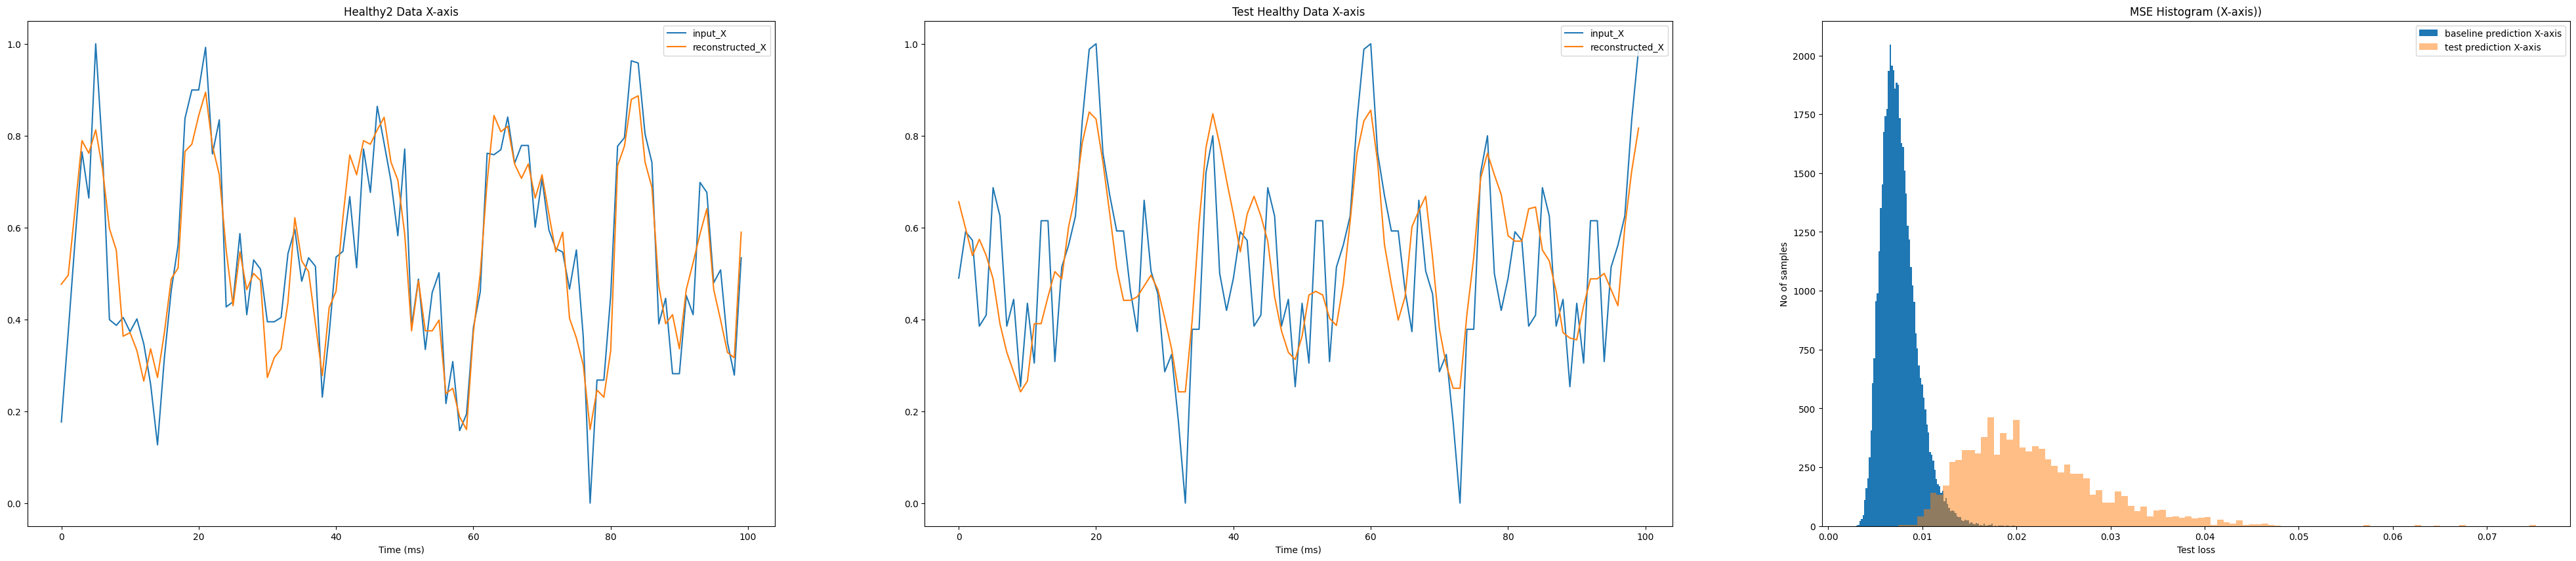

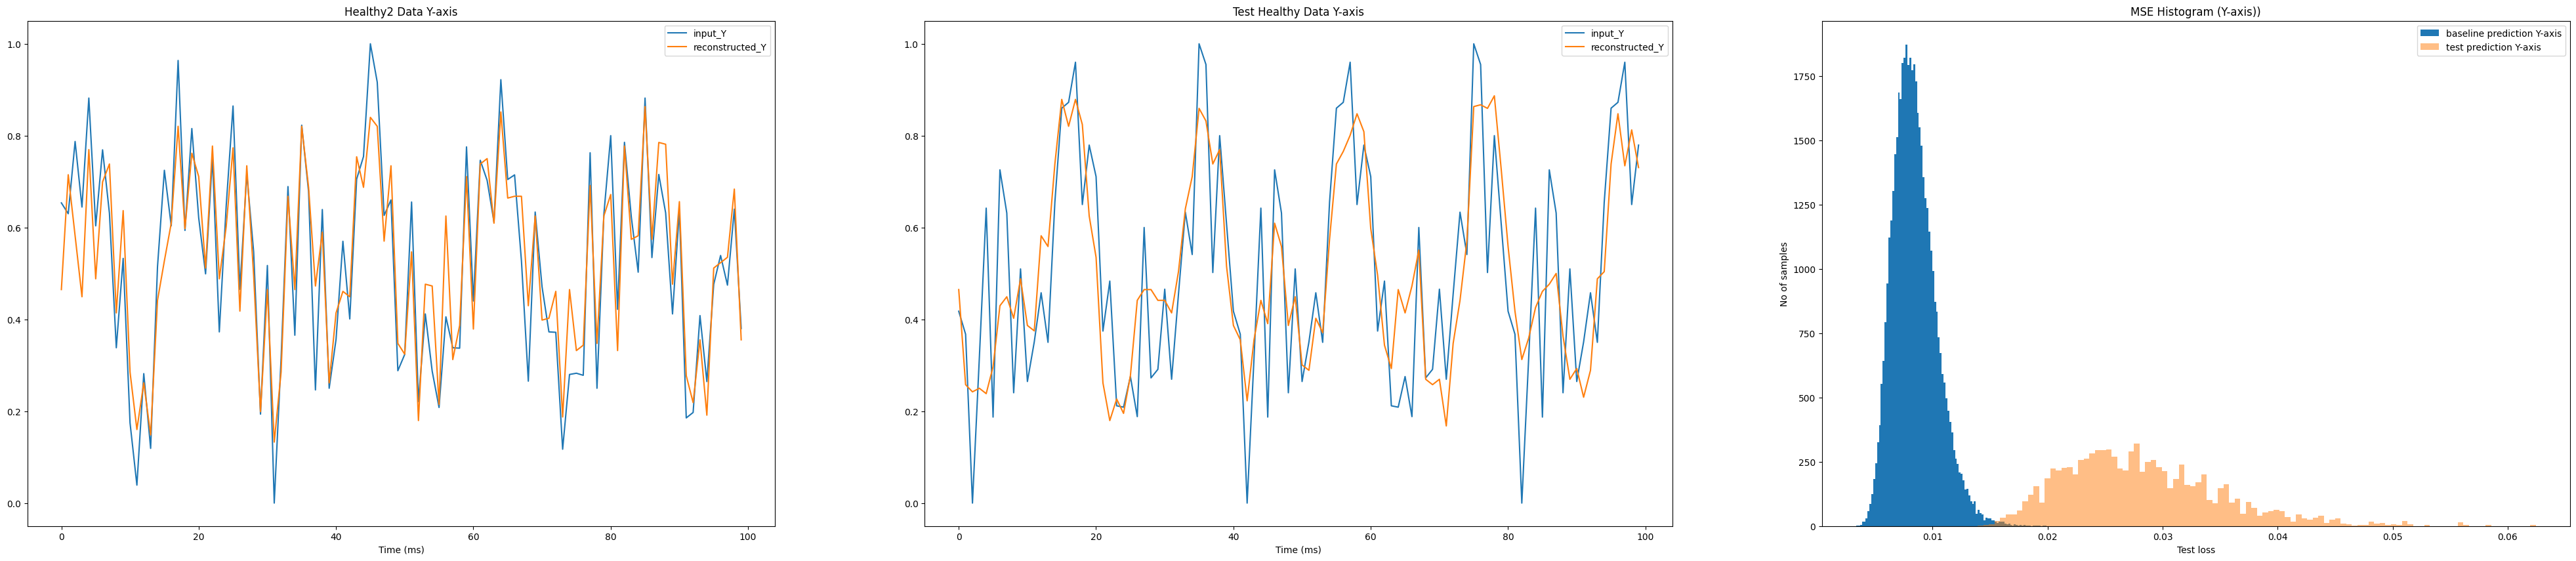

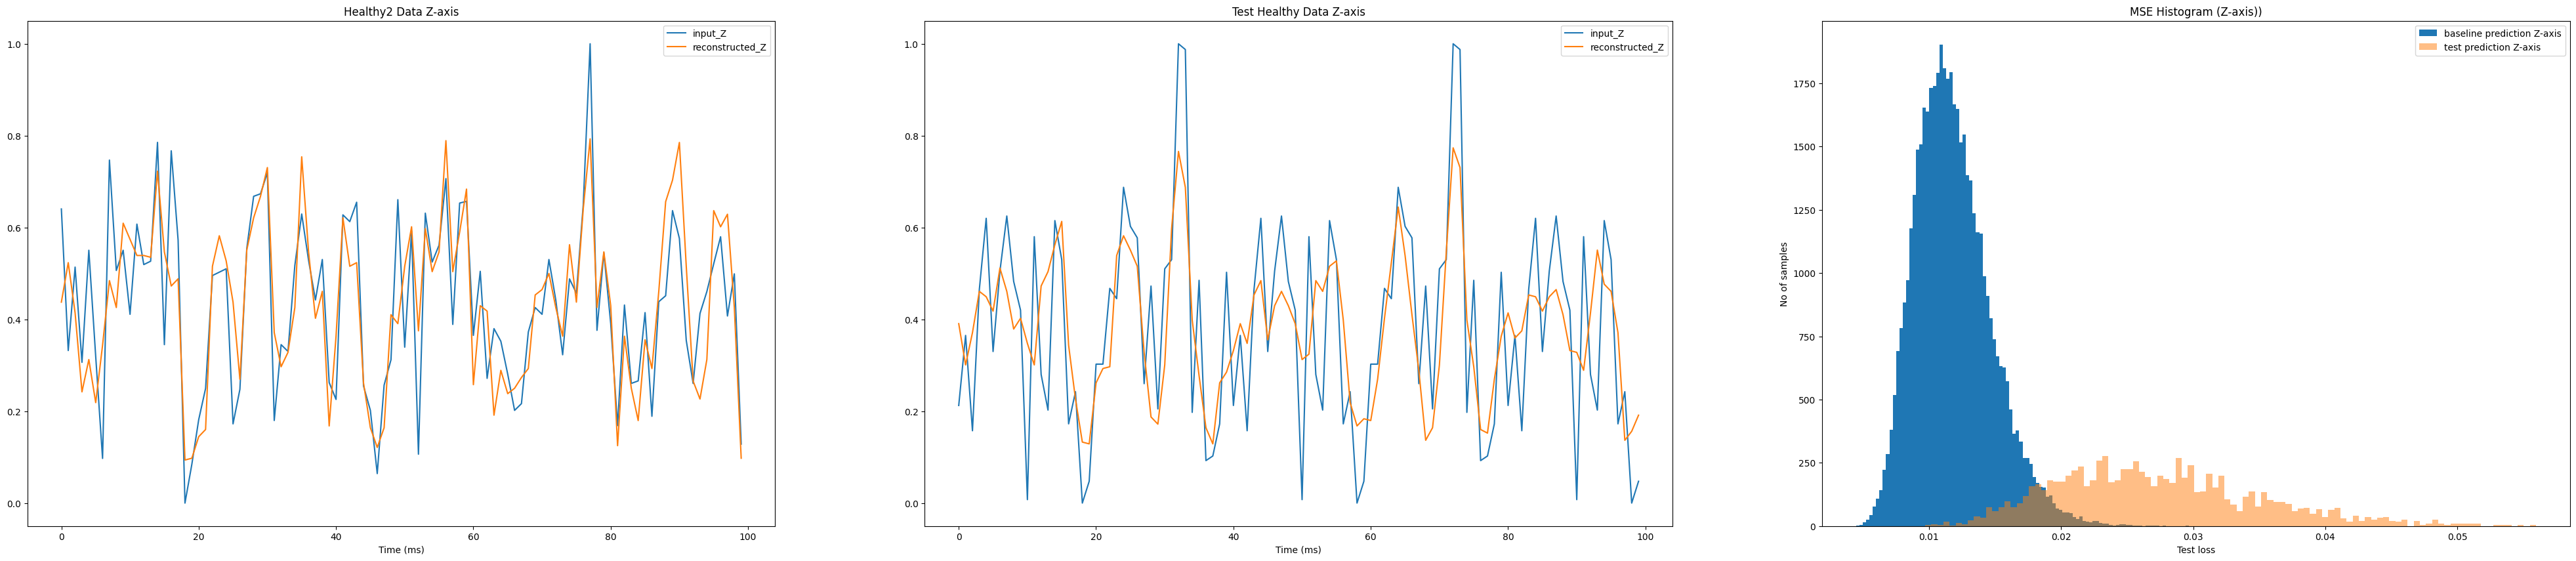

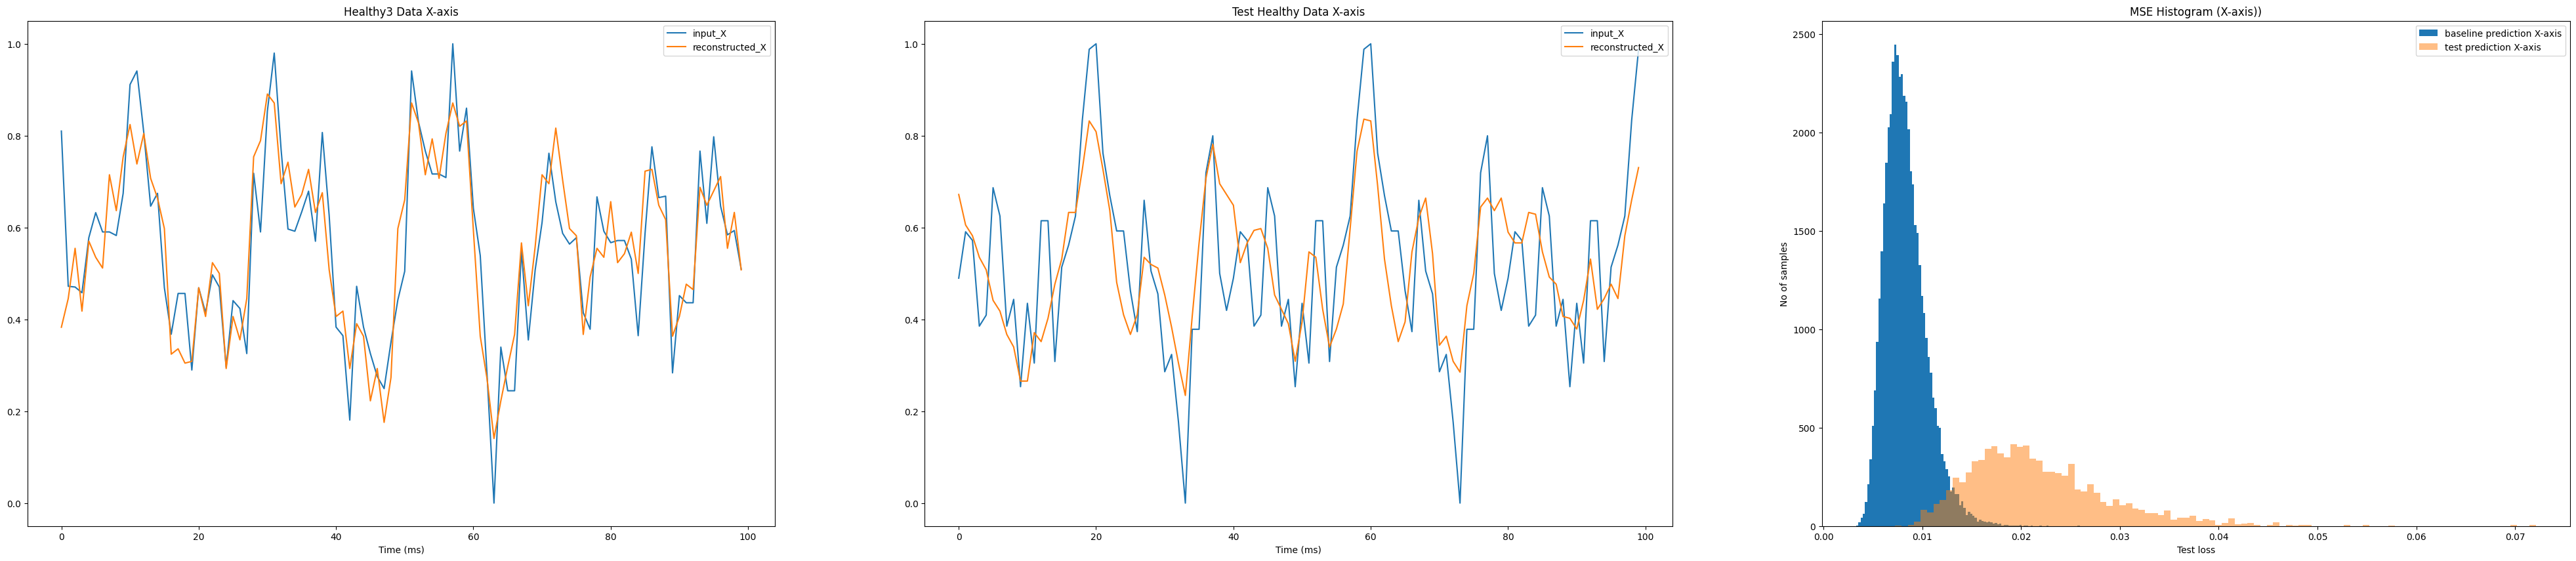

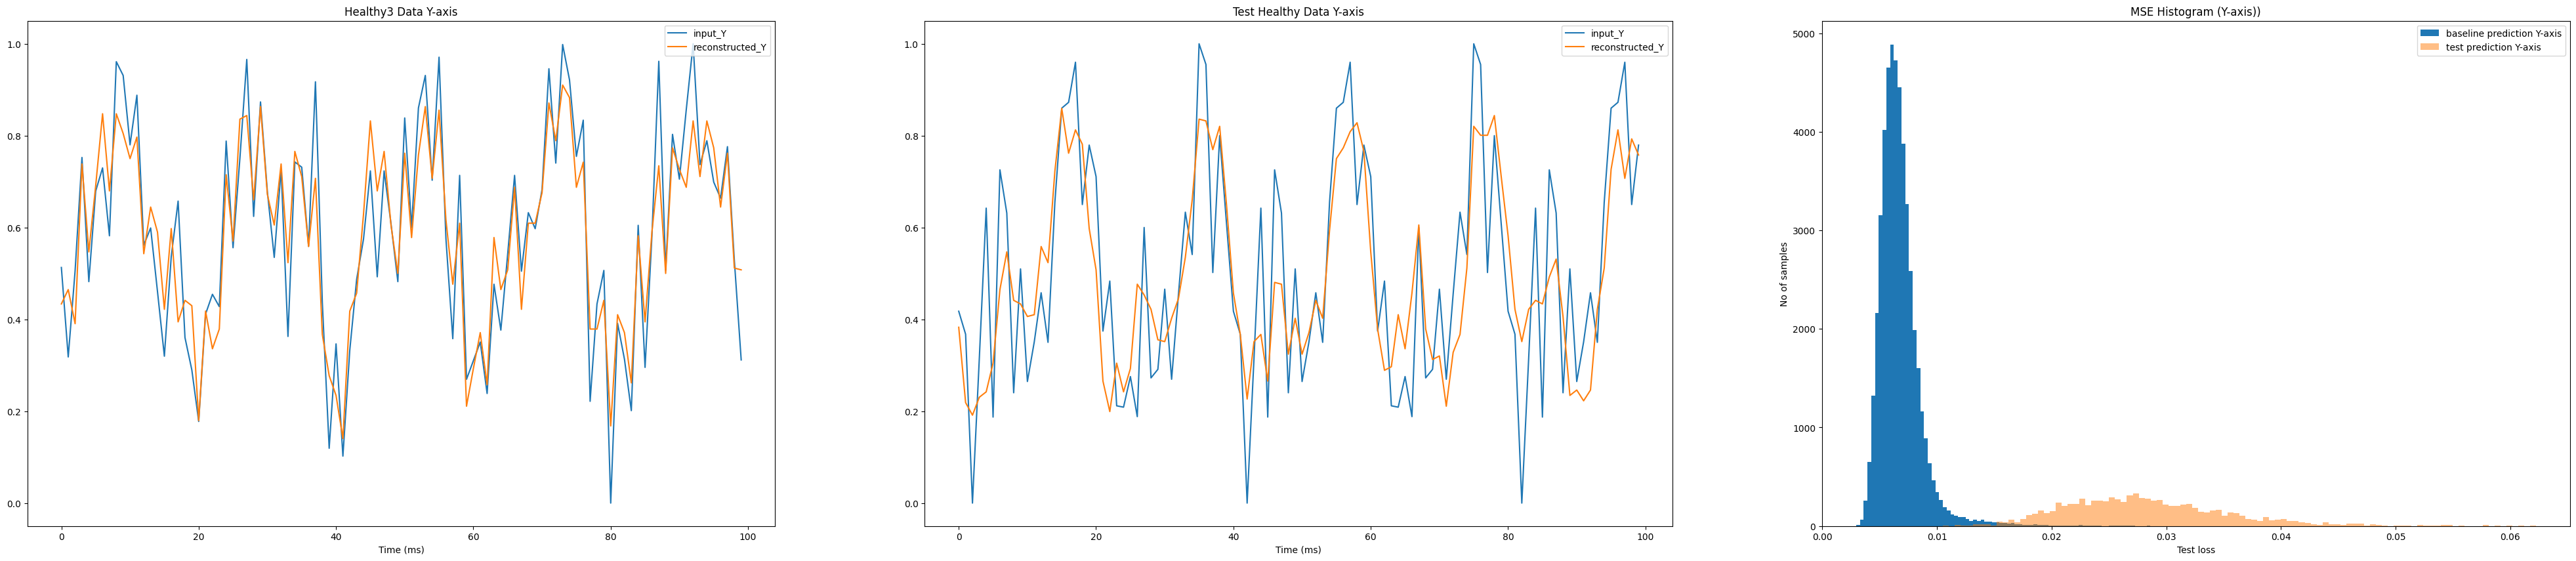

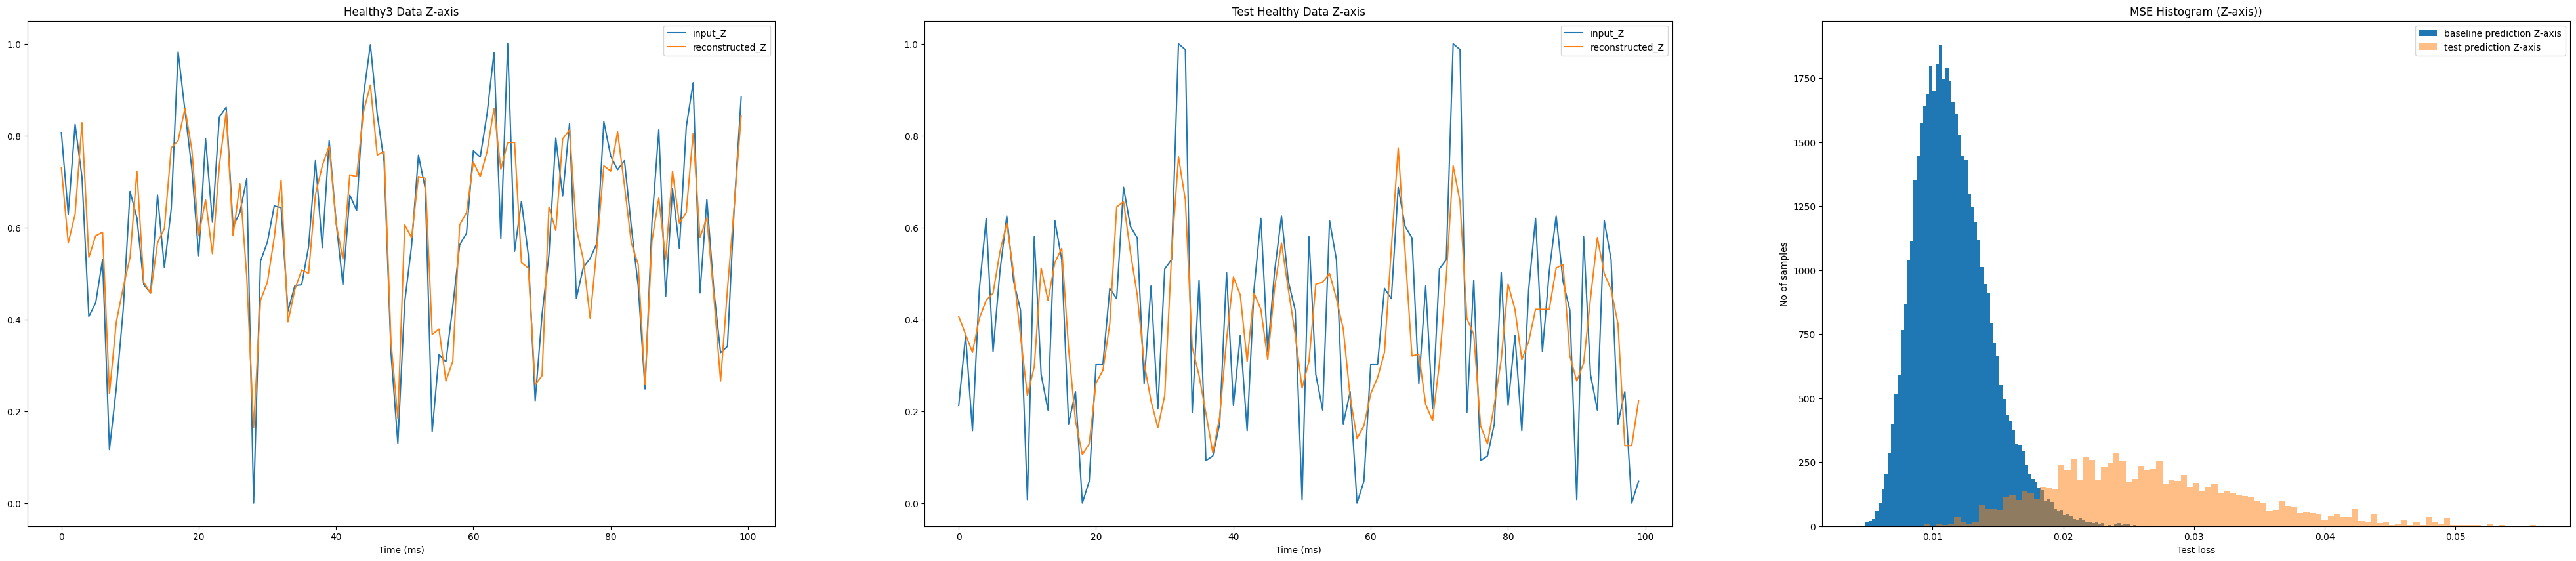

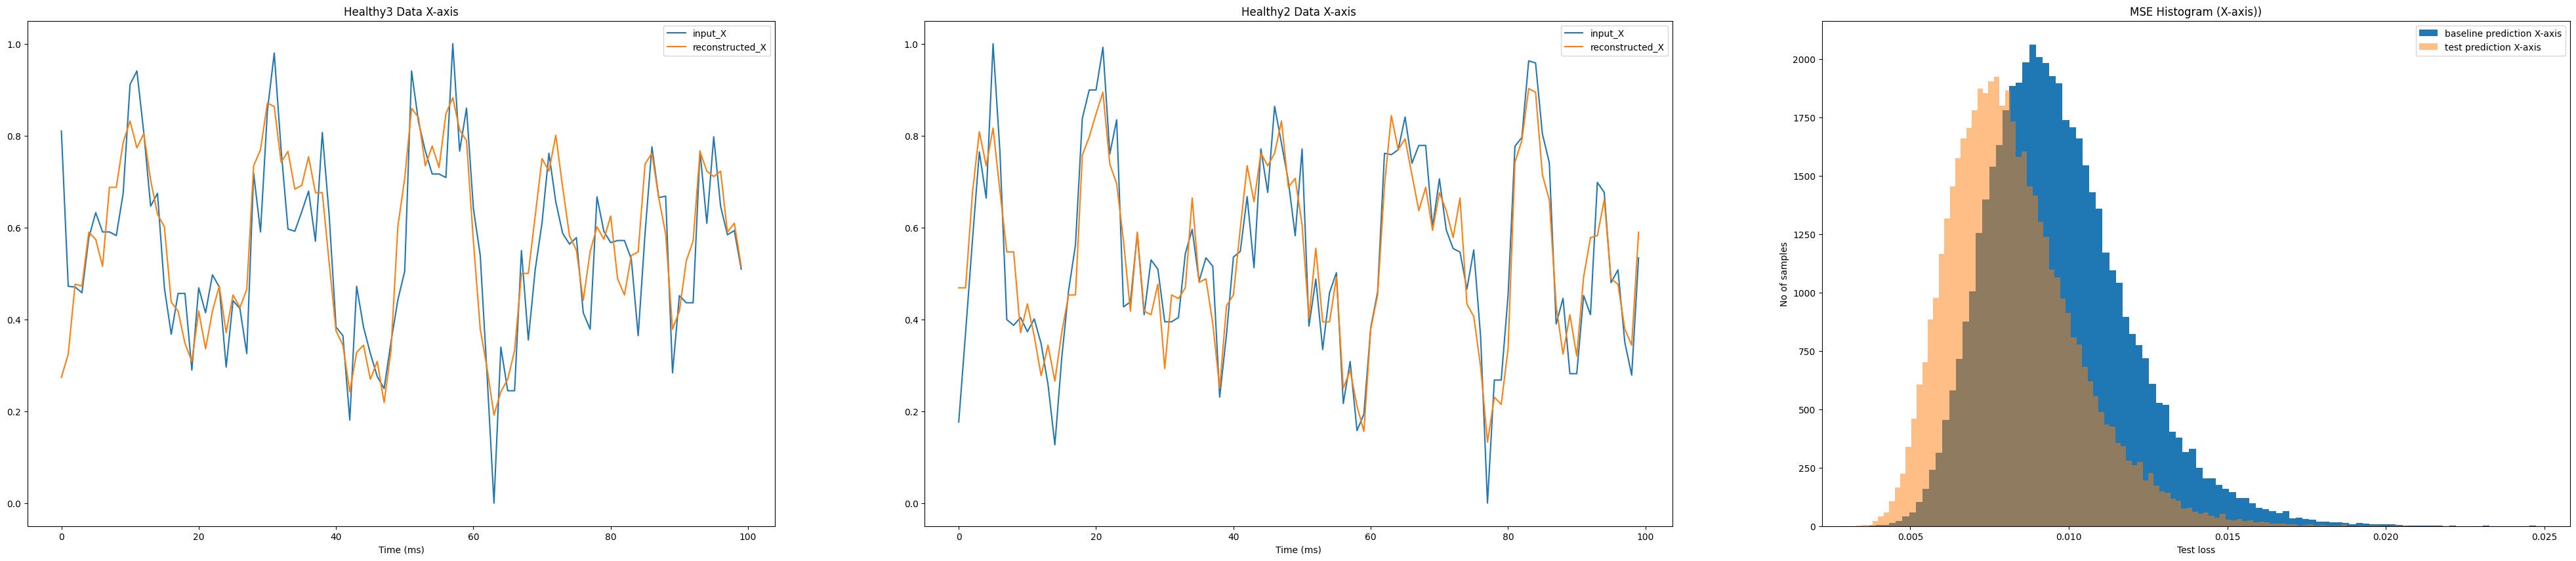

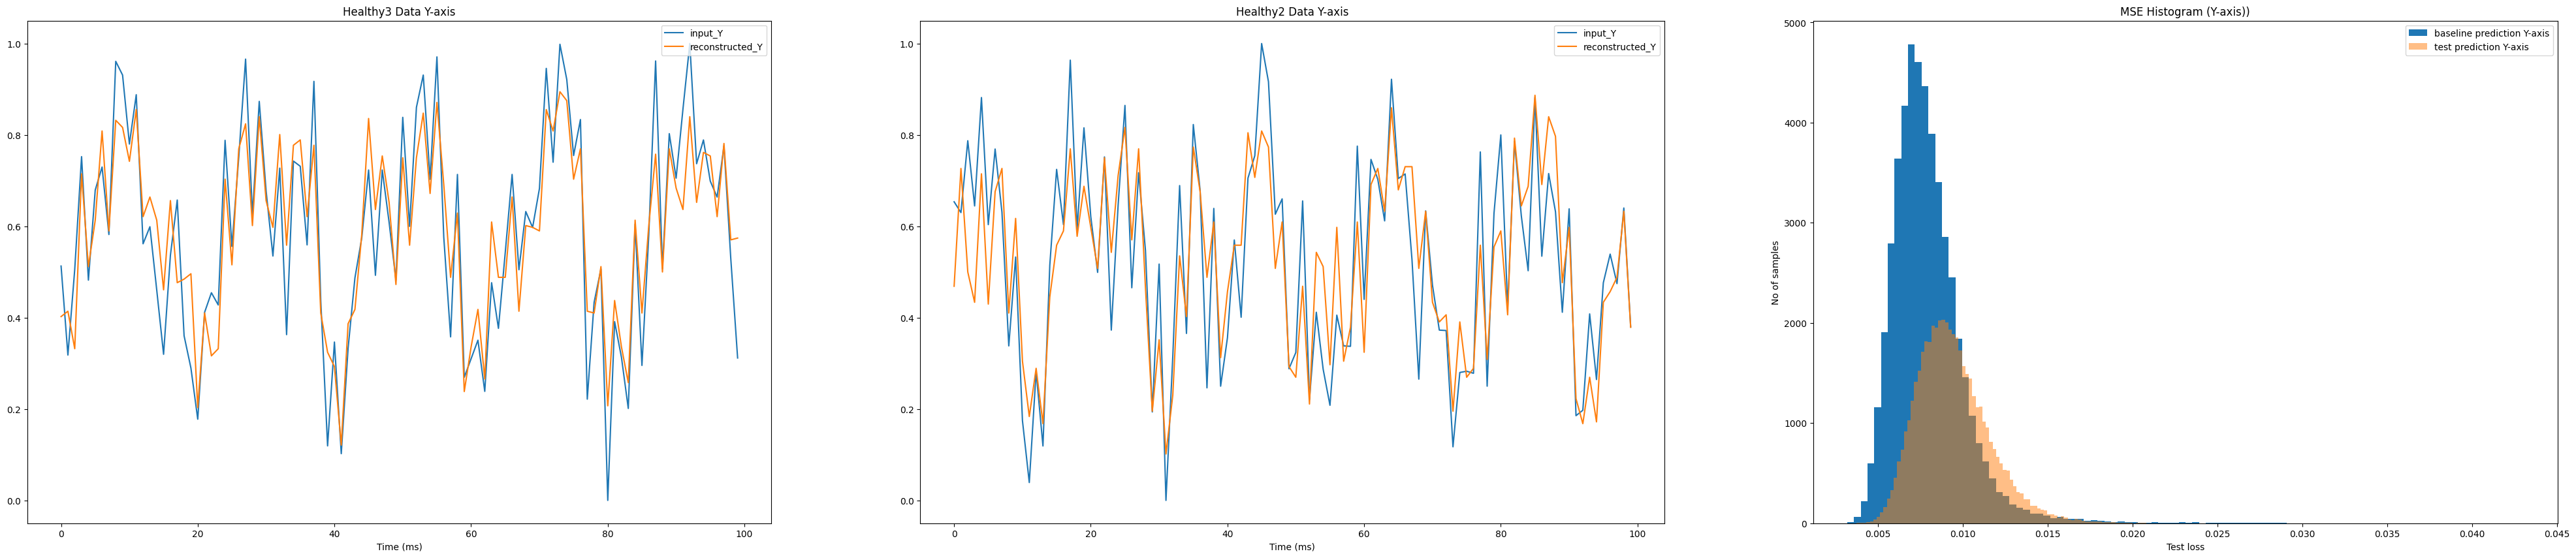

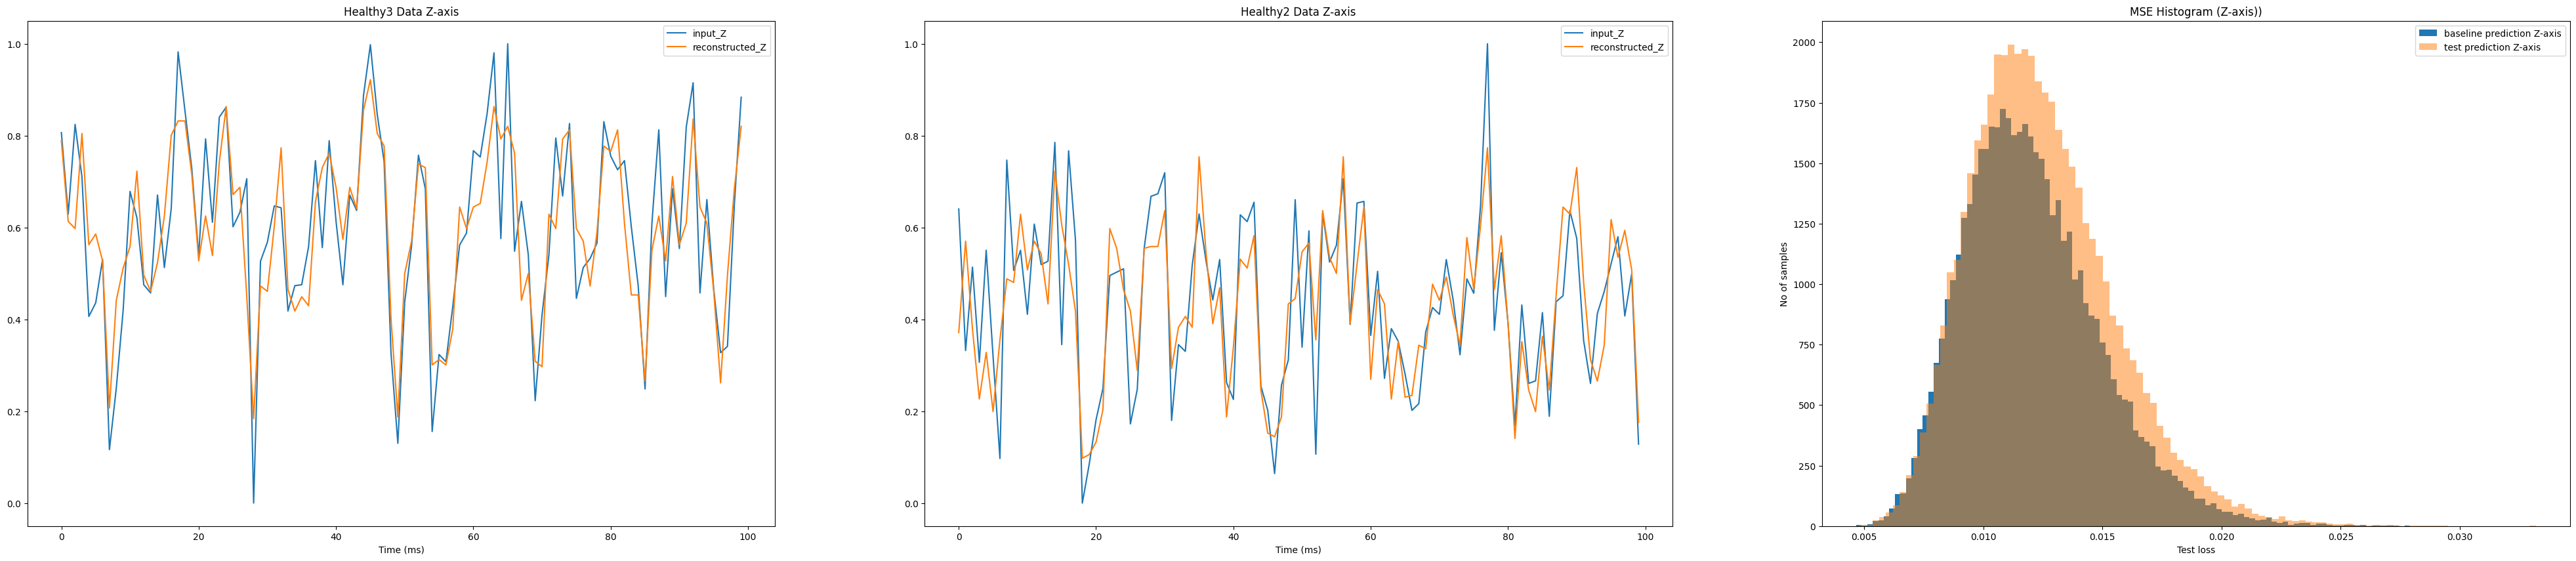

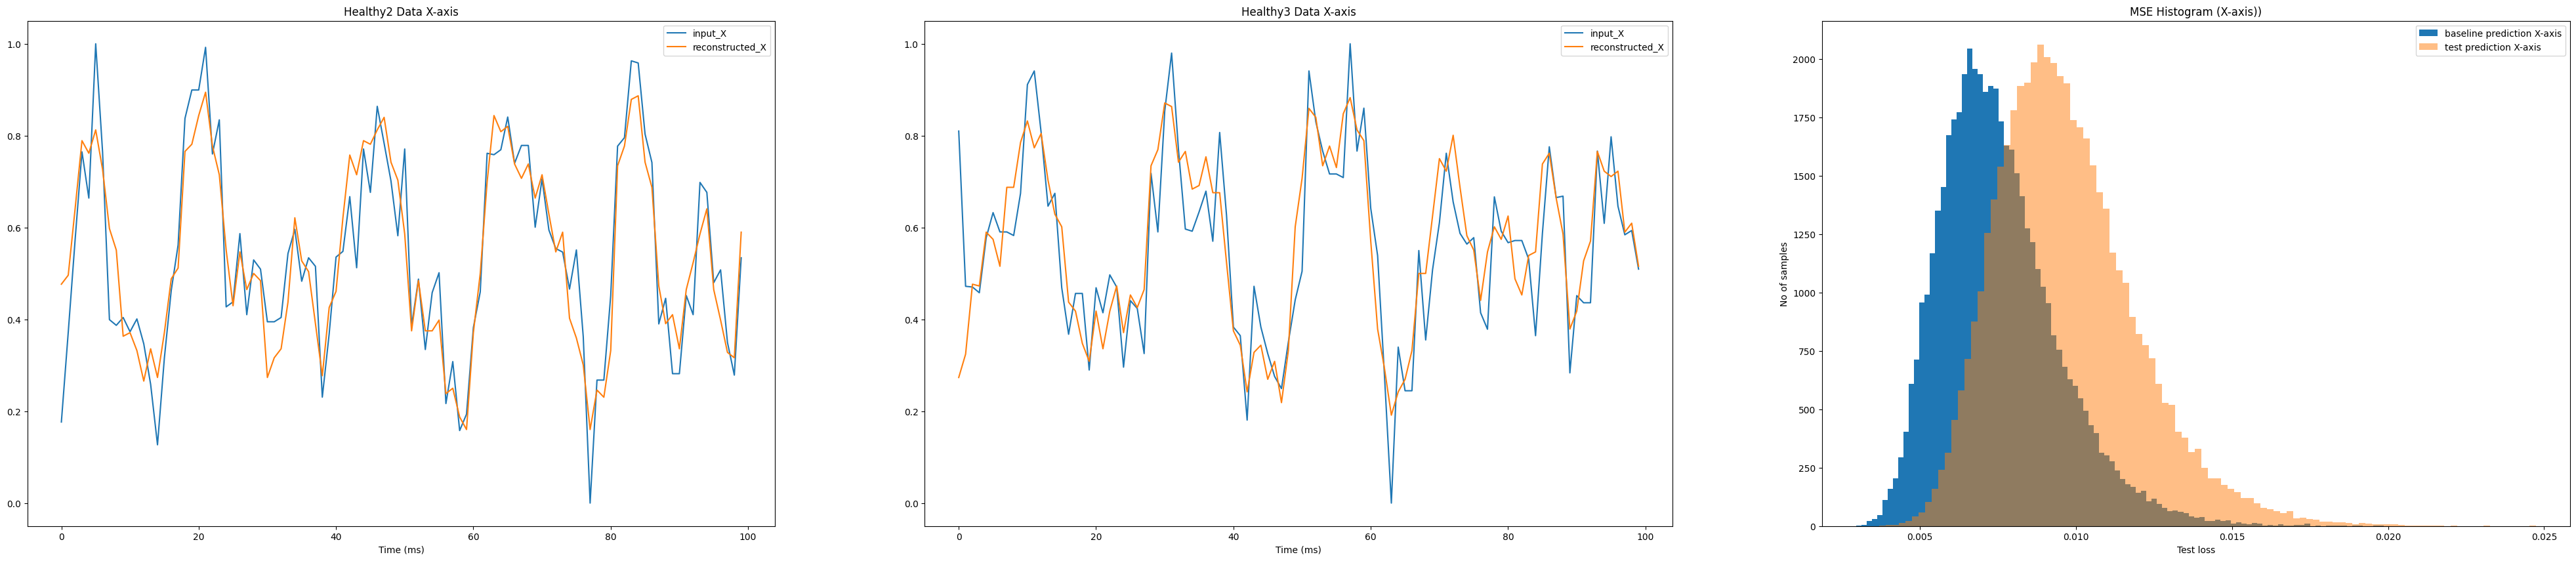

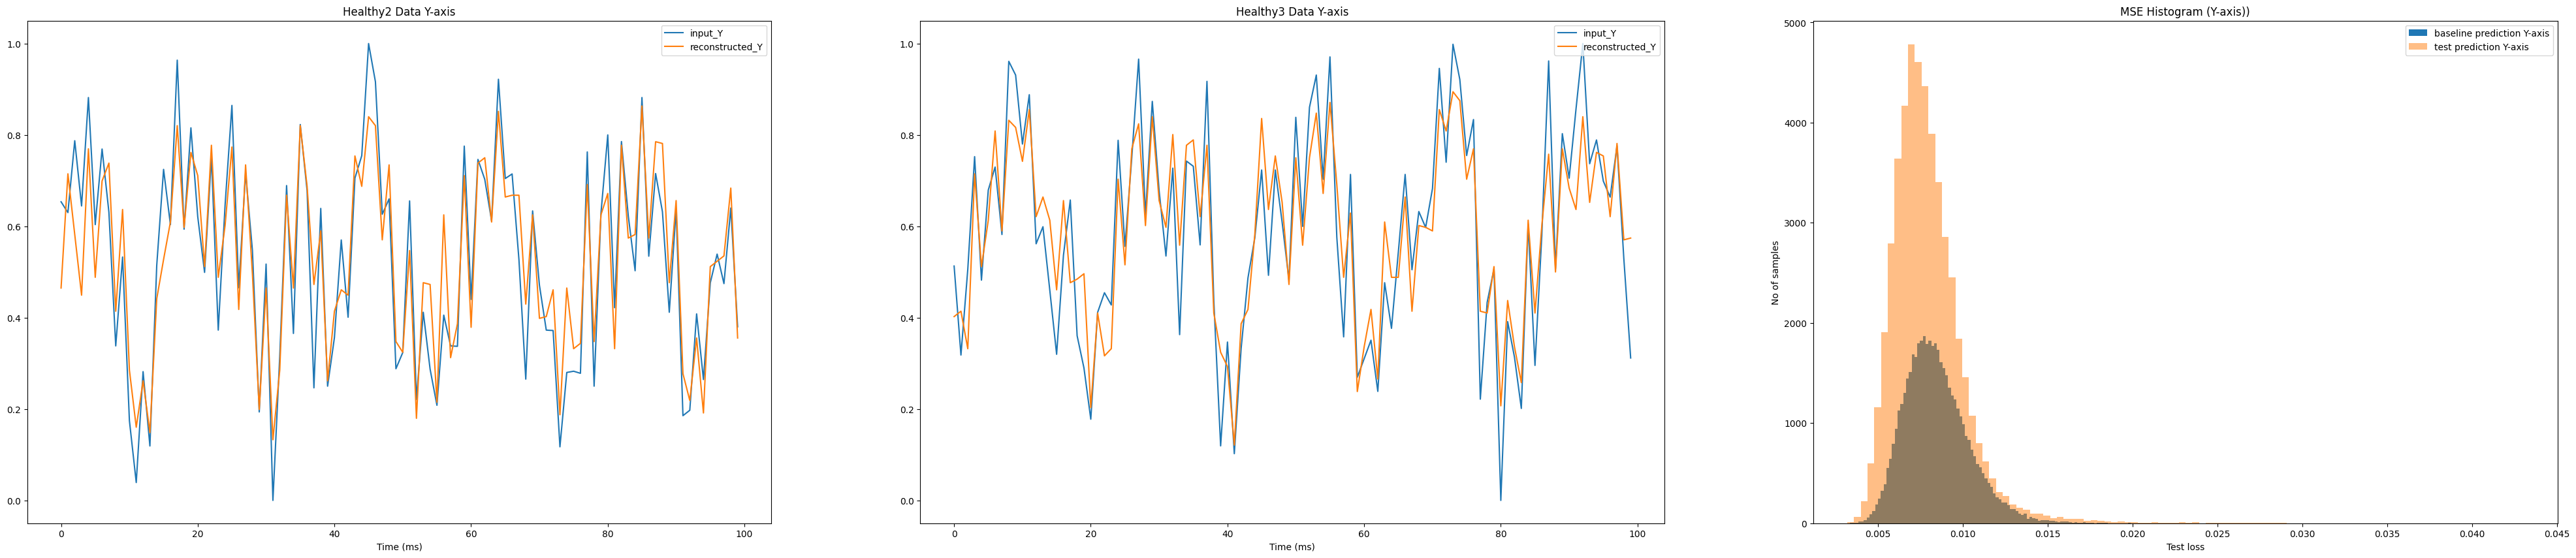

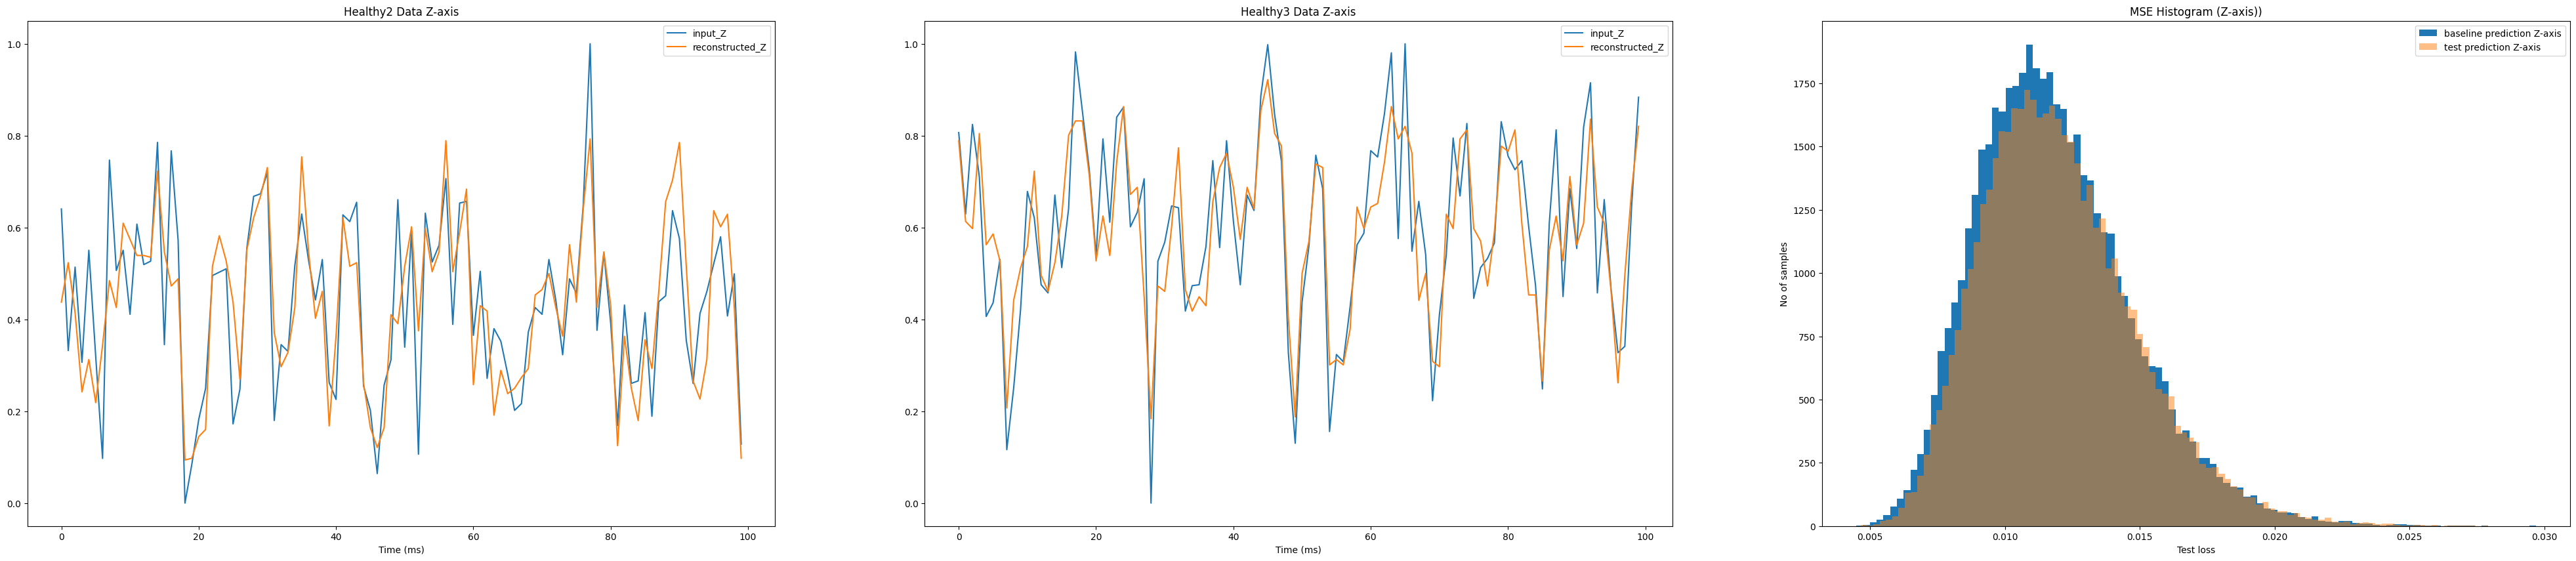

In [69]:
# Function for anomaly detection
def is_anomaly_3axis(data, reconstructed_data, threshold_x, threshold_y, threshold_z, title, ax_x, ax_y, ax_z, axpos):
    # Split data and reconstructed data into 3 axes for plotting
    data_x = data[:, 0, :]
    data_y = data[:, 1, :]
    data_z = data[:, 2, :]
    reconstructed_data_x = reconstructed_data[:, 0, :]
    reconstructed_data_y = reconstructed_data[:, 1, :]
    reconstructed_data_z = reconstructed_data[:, 2, :]
    
    ax_x[axpos].set_title(title + " X-axis")
    ax_x[axpos].plot(data_x[0,:], label='input_X')
    ax_x[axpos].plot(reconstructed_data_x[0,:], label='reconstructed_X')
    ax_x[axpos].set_xlabel("Time (ms)")
    ax_x[axpos].legend(loc='upper right')

    ax_y[axpos].set_title(title + " Y-axis")
    ax_y[axpos].plot(data_y[0,:], label='input_Y')
    ax_y[axpos].plot(reconstructed_data_y[0,:], label='reconstructed_Y')
    ax_y[axpos].set_xlabel("Time (ms)")
    ax_y[axpos].legend(loc='upper right')

    ax_z[axpos].set_title(title + " Z-axis")
    ax_z[axpos].plot(data_z[0,:], label='input_Z')
    ax_z[axpos].plot(reconstructed_data_z[0,:], label='reconstructed_Z')
    ax_z[axpos].set_xlabel("Time (ms)")
    ax_z[axpos].legend(loc='upper right')
    
    mse_x = np.mean(np.power(data_x - reconstructed_data_x, 2), axis = 1)
    mse_y = np.mean(np.power(data_y - reconstructed_data_y, 2), axis = 1)
    mse_z = np.mean(np.power(data_z - reconstructed_data_z, 2), axis = 1)

    return mse_x > threshold_x, mse_x, mse_y > threshold_y, mse_y, mse_z > threshold_z, mse_z

# Function for plotting the loss, anomalies, and MSE histogram
def plot_results_3axis(reconstructed_data_baseline, reconstructed_data_test, threshold_x, threshold_y, threshold_z, baseline_data, test_data, train_title, test_title):
    fig_x, ax_x = plt.subplots(1, 3, figsize=(50, 10))
    fig_y, ax_y = plt.subplots(1, 3, figsize=(50, 10))
    fig_z, ax_z = plt.subplots(1, 3, figsize=(50, 10))
    
    # # Plot training & validation loss values
    # ax[0].plot(history.history['loss'], label='Training Loss')
    # ax[0].plot(history.history['val_loss'], label='Validation Loss')
    # ax[0].set_title('Model Loss')
    # ax[0].set_ylabel('Loss')
    # ax[0].set_xlabel('Epoch')
    # ax[0].legend(loc='upper right')

    anomalies_baseline_x, mse_baseline_x, anomalies_baseline_y, mse_baseline_y, anomalies_baseline_z, mse_baseline_z = is_anomaly_3axis(baseline_data, reconstructed_data_baseline, threshold_x, threshold_y, threshold_z, train_title, ax_x, ax_y, ax_z, 0)
    
    # Calcualting MSE for each axis separately
    count_baseline_x = 0
    for i in anomalies_baseline_x:
        if i == True:
            count_baseline_x += 1
    print("Number of anomalies in baseline_x data:", count_baseline_x, "out of", anomalies_baseline_x.size, "samples")
    print("Anomalies in baseline_x data:", (count_baseline_x / anomalies_baseline_x.size) * 100, "%")

    count_baseline_y = 0
    for i in anomalies_baseline_y:
        if i == True:
            count_baseline_y += 1
    print("Number of anomalies in baseline_y data:", count_baseline_y, "out of", anomalies_baseline_y.size, "samples")
    print("Anomalies in baseline_y data:", (count_baseline_y / anomalies_baseline_y.size) * 100, "%")

    count_baseline_z = 0
    for i in anomalies_baseline_z:
        if i == True:
            count_baseline_z += 1
    print("Number of anomalies in baseline_z data:", count_baseline_z, "out of", anomalies_baseline_z.size, "samples")
    print("Anomalies in baseline_z data:", (count_baseline_z / anomalies_baseline_z.size) * 100, "%")

    # Test data
    anomalies_test_x, mse_test_x, anomalies_test_y, mse_test_y, anomalies_test_z, mse_test_z = is_anomaly_3axis(test_data, reconstructed_data_test, threshold_x, threshold_y, threshold_z, test_title, ax_x, ax_y, ax_z, 1)

    # Calcualting MSE for each axis separately
    count_test_x = 0
    for i in anomalies_test_x:
        if i == True:
            count_test_x += 1
    print("Number of anomalies in test_x data:", count_test_x, "out of", anomalies_test_x.size, "samples")
    print("Anomalies in test_x data:", (count_test_x / anomalies_test_x.size) * 100, "%")

    count_test_y = 0
    for i in anomalies_test_y:
        if i == True:
            count_test_y += 1
    print("Number of anomalies in test_y data:", count_test_y, "out of", anomalies_test_y.size, "samples")
    print("Anomalies in test_y data:", (count_test_y / anomalies_test_y.size) * 100, "%")

    count_test_z = 0
    for i in anomalies_test_z:
        if i == True:
            count_test_z += 1
    print("Number of anomalies in test_z data:", count_test_z, "out of", anomalies_test_z.size, "samples")
    print("Anomalies in test data_z:", (count_test_z / anomalies_test_z.size) * 100, "%")


    # plot mse histogram
    ax_x[2].set_title("MSE Histogram (X-axis))")
    ax_x[2].hist(mse_baseline_x, bins=100, label='baseline prediction X-axis')
    ax_x[2].hist(mse_test_x, bins=100, label='test prediction X-axis', alpha=0.5)
    ax_x[2].set_xlabel("Test loss")
    ax_x[2].set_ylabel("No of samples")
    ax_x[2].legend(loc='upper right')
    fig_x.show()

    ax_y[2].set_title("MSE Histogram (Y-axis))")
    ax_y[2].hist(mse_baseline_y, bins=100, label='baseline prediction Y-axis')
    ax_y[2].hist(mse_test_y, bins=100, label='test prediction Y-axis', alpha=0.5)
    ax_y[2].set_xlabel("Test loss")
    ax_y[2].set_ylabel("No of samples")
    ax_y[2].legend(loc='upper right')
    fig_y.show()

    ax_z[2].set_title("MSE Histogram (Z-axis))")
    ax_z[2].hist(mse_baseline_z, bins=100, label='baseline prediction Z-axis')
    ax_z[2].hist(mse_test_z, bins=100, label='test prediction Z-axis', alpha=0.5)
    ax_z[2].set_xlabel("Test loss")
    ax_z[2].set_ylabel("No of samples")
    ax_z[2].legend(loc='upper right')
    fig_z.show()

# Plotting the results for test healthy data against healthy2 data
print("Plotting the results for test healthy data against healthy2 data")
plot_results_3axis(recon_healthy2_from_healthy2_3axis, recon_test_from_healthy2_3axis, calculated_threshold_healthy2_3axis_x, calculated_threshold_healthy2_3axis_y, calculated_threshold_healthy2_3axis_z, healthy2_data_3axis, test_data_3axis, "Healthy2 Data", "Test Healthy Data")
print("-------------------------------------------------------")

# Plotting the results for test healthy data against healthy3 data
print("Plotting the results for test healthy data against healthy3 data")
plot_results_3axis(recon_healthy3_from_healthy3_3axis, recon_test_from_healthy3_3axis, calculated_threshold_healthy3_3axis_x, calculated_threshold_healthy3_3axis_y, calculated_threshold_healthy3_3axis_z, healthy3_data_3axis, test_data_3axis, "Healthy3 Data", "Test Healthy Data")
print("-------------------------------------------------------")

# Plotting the results for healthy2 data against healthy3 data
print("Plotting the results for healthy2 data against healthy3 data")
plot_results_3axis(recon_healthy3_from_healthy2_3axis, recon_healthy2_from_healthy3_3axis, calculated_threshold_healthy3_3axis_x, calculated_threshold_healthy3_3axis_y, calculated_threshold_healthy3_3axis_z, healthy3_data_3axis, healthy2_data_3axis, "Healthy3 Data", "Healthy2 Data")
print("-------------------------------------------------------")

# Plotting the results for healthy3 data against healthy2 data
print("Plotting the results for healthy3 data against healthy2 data")
plot_results_3axis(recon_healthy2_from_healthy2_3axis, recon_healthy3_from_healthy2_3axis, calculated_threshold_healthy2_3axis_x, calculated_threshold_healthy2_3axis_y, calculated_threshold_healthy2_3axis_z, healthy2_data_3axis, healthy3_data_3axis, "Healthy2 Data", "Healthy3 Data")
print("-------------------------------------------------------")



In [88]:
# Getting data to csv to put on to Google sheets
# sample_size = 10000

# healthy_data_to_test = pd.DataFrame(healthy_data)
# healthy_data_to_test = healthy_data_to_test.sample(n=sample_size)

# unhealthy_data_to_test = pd.DataFrame(unhealthy_data)
# unhealthy_data_to_test = unhealthy_data_to_test.sample(n=sample_size)

# healthy_data_to_test.to_csv('C:/Users/jared/Desktop/TFLite_ARhealthydata.csv',index=False,header=False)
# unhealthy_data_to_test.to_csv('C:/Users/jared/Desktop/TFLite_ARunhealthydata.csv',index=False,header=False)